 First, we mount to our Google Drive 

In [ ]:
# Mount to the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from statistics import mean


Reading in the dataset

In [ ]:
# Our dataset 
tb_player = pd.read_csv('/content/gdrive/MyDrive/BA476_SP22/Dataset /tb_players.csv')
tb_lobby_stats_player = pd.read_csv('/content/gdrive/MyDrive/BA476_SP22/Dataset /tb_lobby_stats_player.csv')
tb_medalha = pd.read_csv('/content/gdrive/MyDrive/BA476_SP22/Dataset /tb_medalha.csv')
tb_players_medalha = pd.read_csv('/content/gdrive/MyDrive/BA476_SP22/Dataset /tb_players_medalha.csv')


### Overview of our dataset


In [ ]:
tb_player.head()

idPlayer  flFacebook  flTwitter  flTwitch descCountry dtBirth  \
0         1           0          0         0          cl     NaN   
1         2           0          0         0          br     NaN   
2         3           0          0         0          br     NaN   
3         4           0          0         0          br     NaN   
4         5           0          0         0          ar     NaN   

        dtRegistration  
0  2021-03-19 21:31:39  
1  2020-05-06 19:28:29  
2  2020-01-28 13:00:38  
3  2017-05-31 16:13:51  
4  2021-02-08 11:57:21

In [ ]:
tb_lobby_stats_player.head()

idLobbyGame  idPlayer  idRoom  qtKill  qtAssist  qtDeath  qtHs  \
0            1         1       1       5         1       16     2   
1            2         1       2      24         3       18     6   
2            3         2       3       6         4       23     2   
3            3       391   27508      10         5       20     4   
4            4         2       4       8         4       26     6   

   qtBombeDefuse  qtBombePlant  qtTk  ...  qtFlashAssist  qtHitHeadshot  \
0              0             0   0.0  ...            0.0            3.0   
1              0             4   0.0  ...            0.0            7.0   
2              0             1   0.0  ...            0.0            3.0   
3              1             0   0.0  ...            0.0            6.0   
4              0             2   0.0  ...            2.0            8.0   

   qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
0        13.0           4.0           2.0            2.0           1.0   
1        26.0          14.0           2.0            1.0           1.0   
2        15.0           8.0           1.0            2.0           0.0   
3        27.0          10.0           1.0            7.0           6.0   
4        19.0          12.0           2.0            3.0           2.0   

   qtHitRightLeg  flWinner          dtCreatedAt  
0            0.0         0  2022-01-21 19:45:44  
1            3.0         1  2022-02-04 02:09:47  
2            2.0         0  2021-09-18 18:07:43  
3            6.0         1  2021-09-18 18:07:43  
4            5.0         0  2021-09-27 00:17:45  

[5 rows x 38 columns]

In [ ]:
tb_medalha.head()

idMedal                  descMedal descTypeMedal
0        1             Membro Premium         MEDAL
1        2                      Elite         MEDAL
2        3                Membro Plus         MEDAL
3        4          Bom Comportamento         MEDAL
4        5  Já conquistou 25 Vitórias         MEDAL

In [ ]:
tb_players_medalha.head()

id  idPlayer  idMedal dtCreatedAt dtExpiration    dtRemove  flActive
0   1      1982        1  2018-10-04   2016-07-23  2016-07-24         0
1   2      1982        1  2018-12-12   2017-01-11  2017-01-12         0
2   3      1982        1  2019-01-08   2017-03-16  2017-03-17         0
3   4      1982        1  2018-12-09   2017-09-10  2017-09-11         0
4   5      1982        1  2018-10-04   2018-03-19  2018-03-20         0

### Basic summary of the dataset

In [ ]:
#dataset basic info 
info = pd.DataFrame({'Dataset' : ['tb_player','tb_lobby_stats_player','tb_medalha','tb_players_medalha'], 
                     'shape':[tb_player.shape, tb_lobby_stats_player.shape,tb_medalha.shape,tb_players_medalha.shape]})
info

Dataset         shape
0              tb_player     (2716, 7)
1  tb_lobby_stats_player  (184152, 38)
2             tb_medalha       (47, 3)
3     tb_players_medalha    (32700, 7)

(array([ 1951.,  5171.,  8114., 10854., 22847., 22953., 24507., 26649.,
        25803., 35303.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

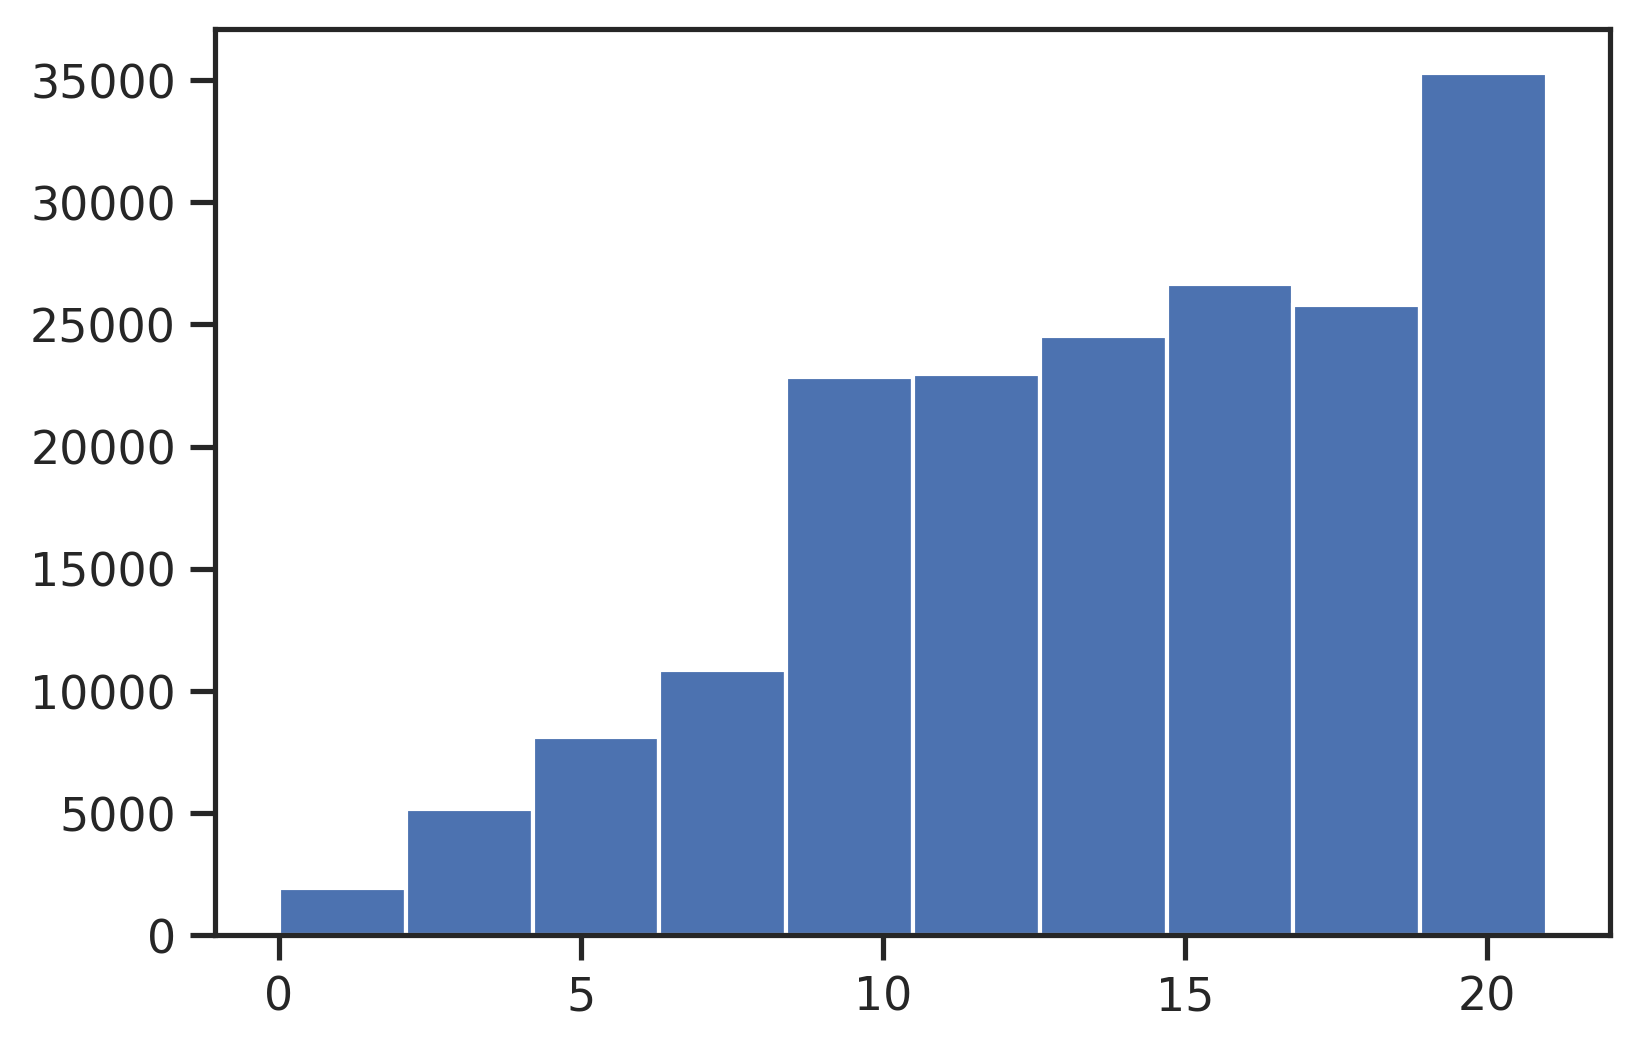

In [ ]:
#player's level histogram 
plt.hist(tb_lobby_stats_player['vlLevel'])

In [ ]:
tb_lobby_stats_player['vlLevel'].unique()

array([10,  9,  2, 15,  5,  1,  3, 13, 14, 17, 18,  0, 11,  4,  7, 12, 20,
       19, 21, 16,  8,  6])

In [ ]:
BirthdayNaRate = tb_player['dtBirth'].isna().sum() / tb_player['dtBirth'].size
plyerBirth = tb_player['dtBirth'].dropna().array

In [ ]:
age = []
for index in range(plyerBirth.size):
  year = 2022 - int(str(plyerBirth[index])[0:4])
  age.append(year)

(array([482., 954., 464.,  82.,  17.,   5.,   1.,   1.,   1.,   1.]),
 array([14. , 20.4, 26.8, 33.2, 39.6, 46. , 52.4, 58.8, 65.2, 71.6, 78. ]),
 <a list of 10 Patch objects>)

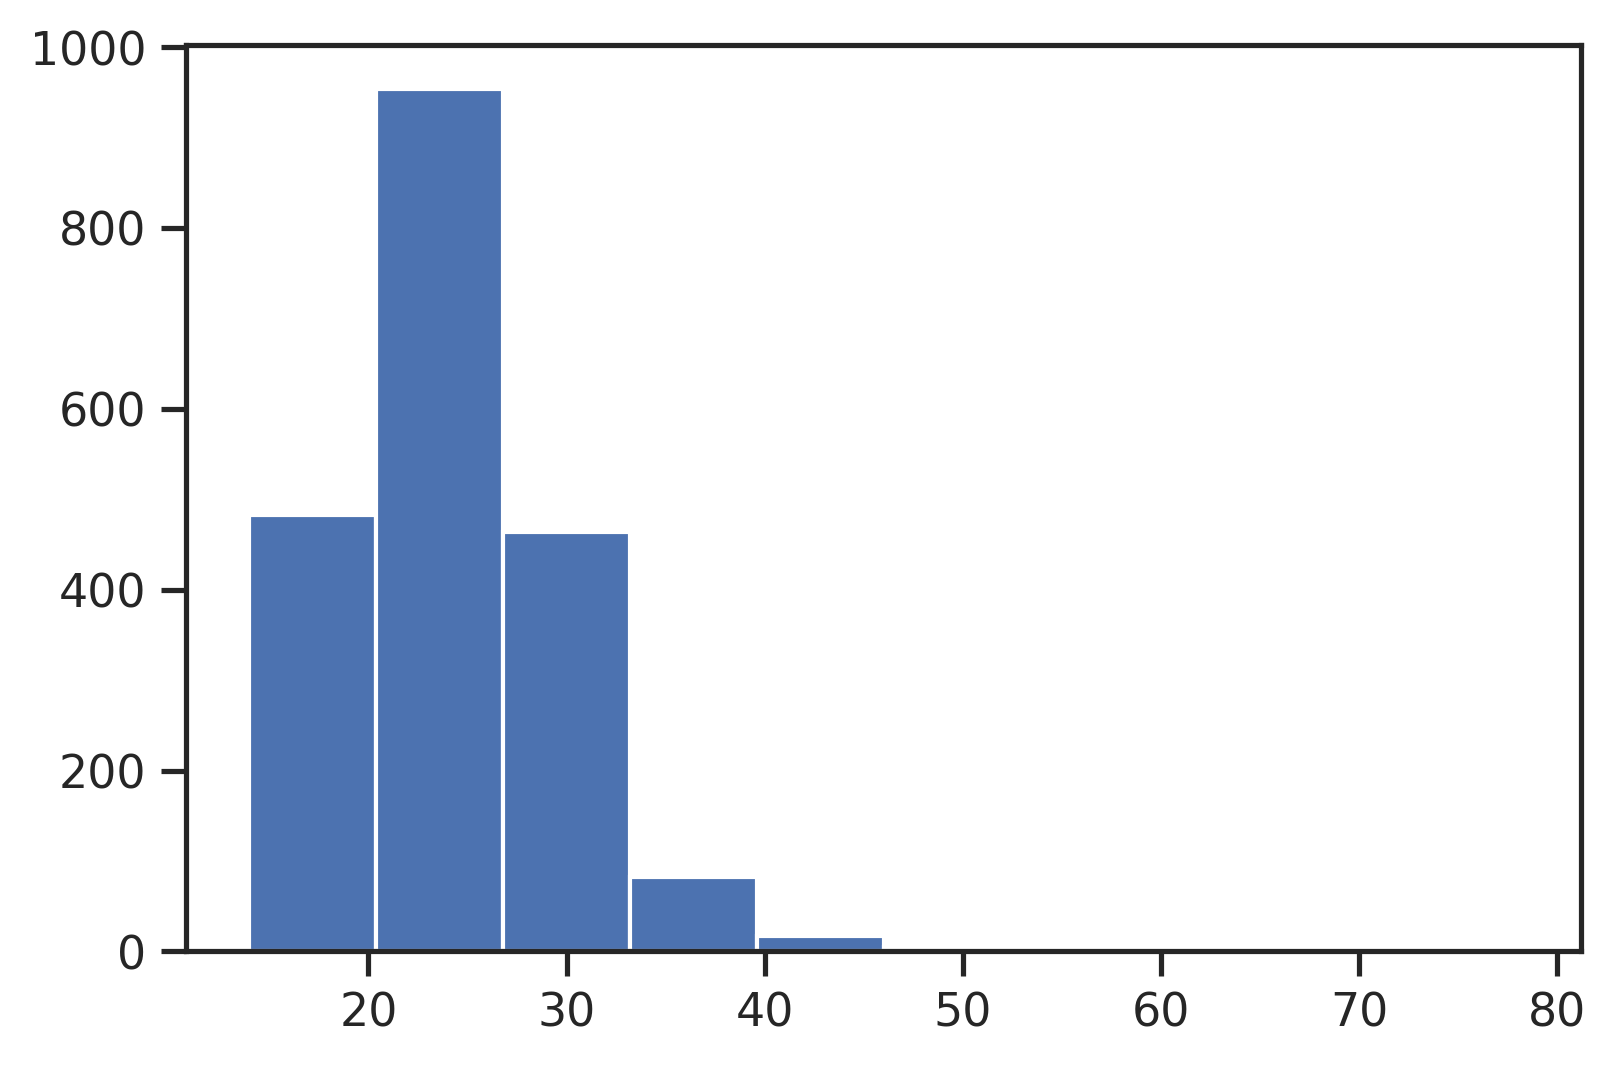

In [ ]:
plt.hist(age)

In [ ]:
#playercountry = tb_player['descCountry'].array
Sumplayercountry = pd.DataFrame(tb_player[['descCountry','flTwitter']]).groupby('descCountry').count()

In [ ]:
Sumplayercountry = pd.DataFrame(Sumplayercountry).reset_index()
Sumplayercountry.columns = ['Country','count']
Sumplayercountry

Country  count
0       ar    491
1       bo      3
2       br   2071
3       ca      1
4       cl     92
5       cr      1
6       ec      2
7       pe     17
8       pt      1
9       py      5
10      sv      1
11      us     10
12      uy     21

Features selection

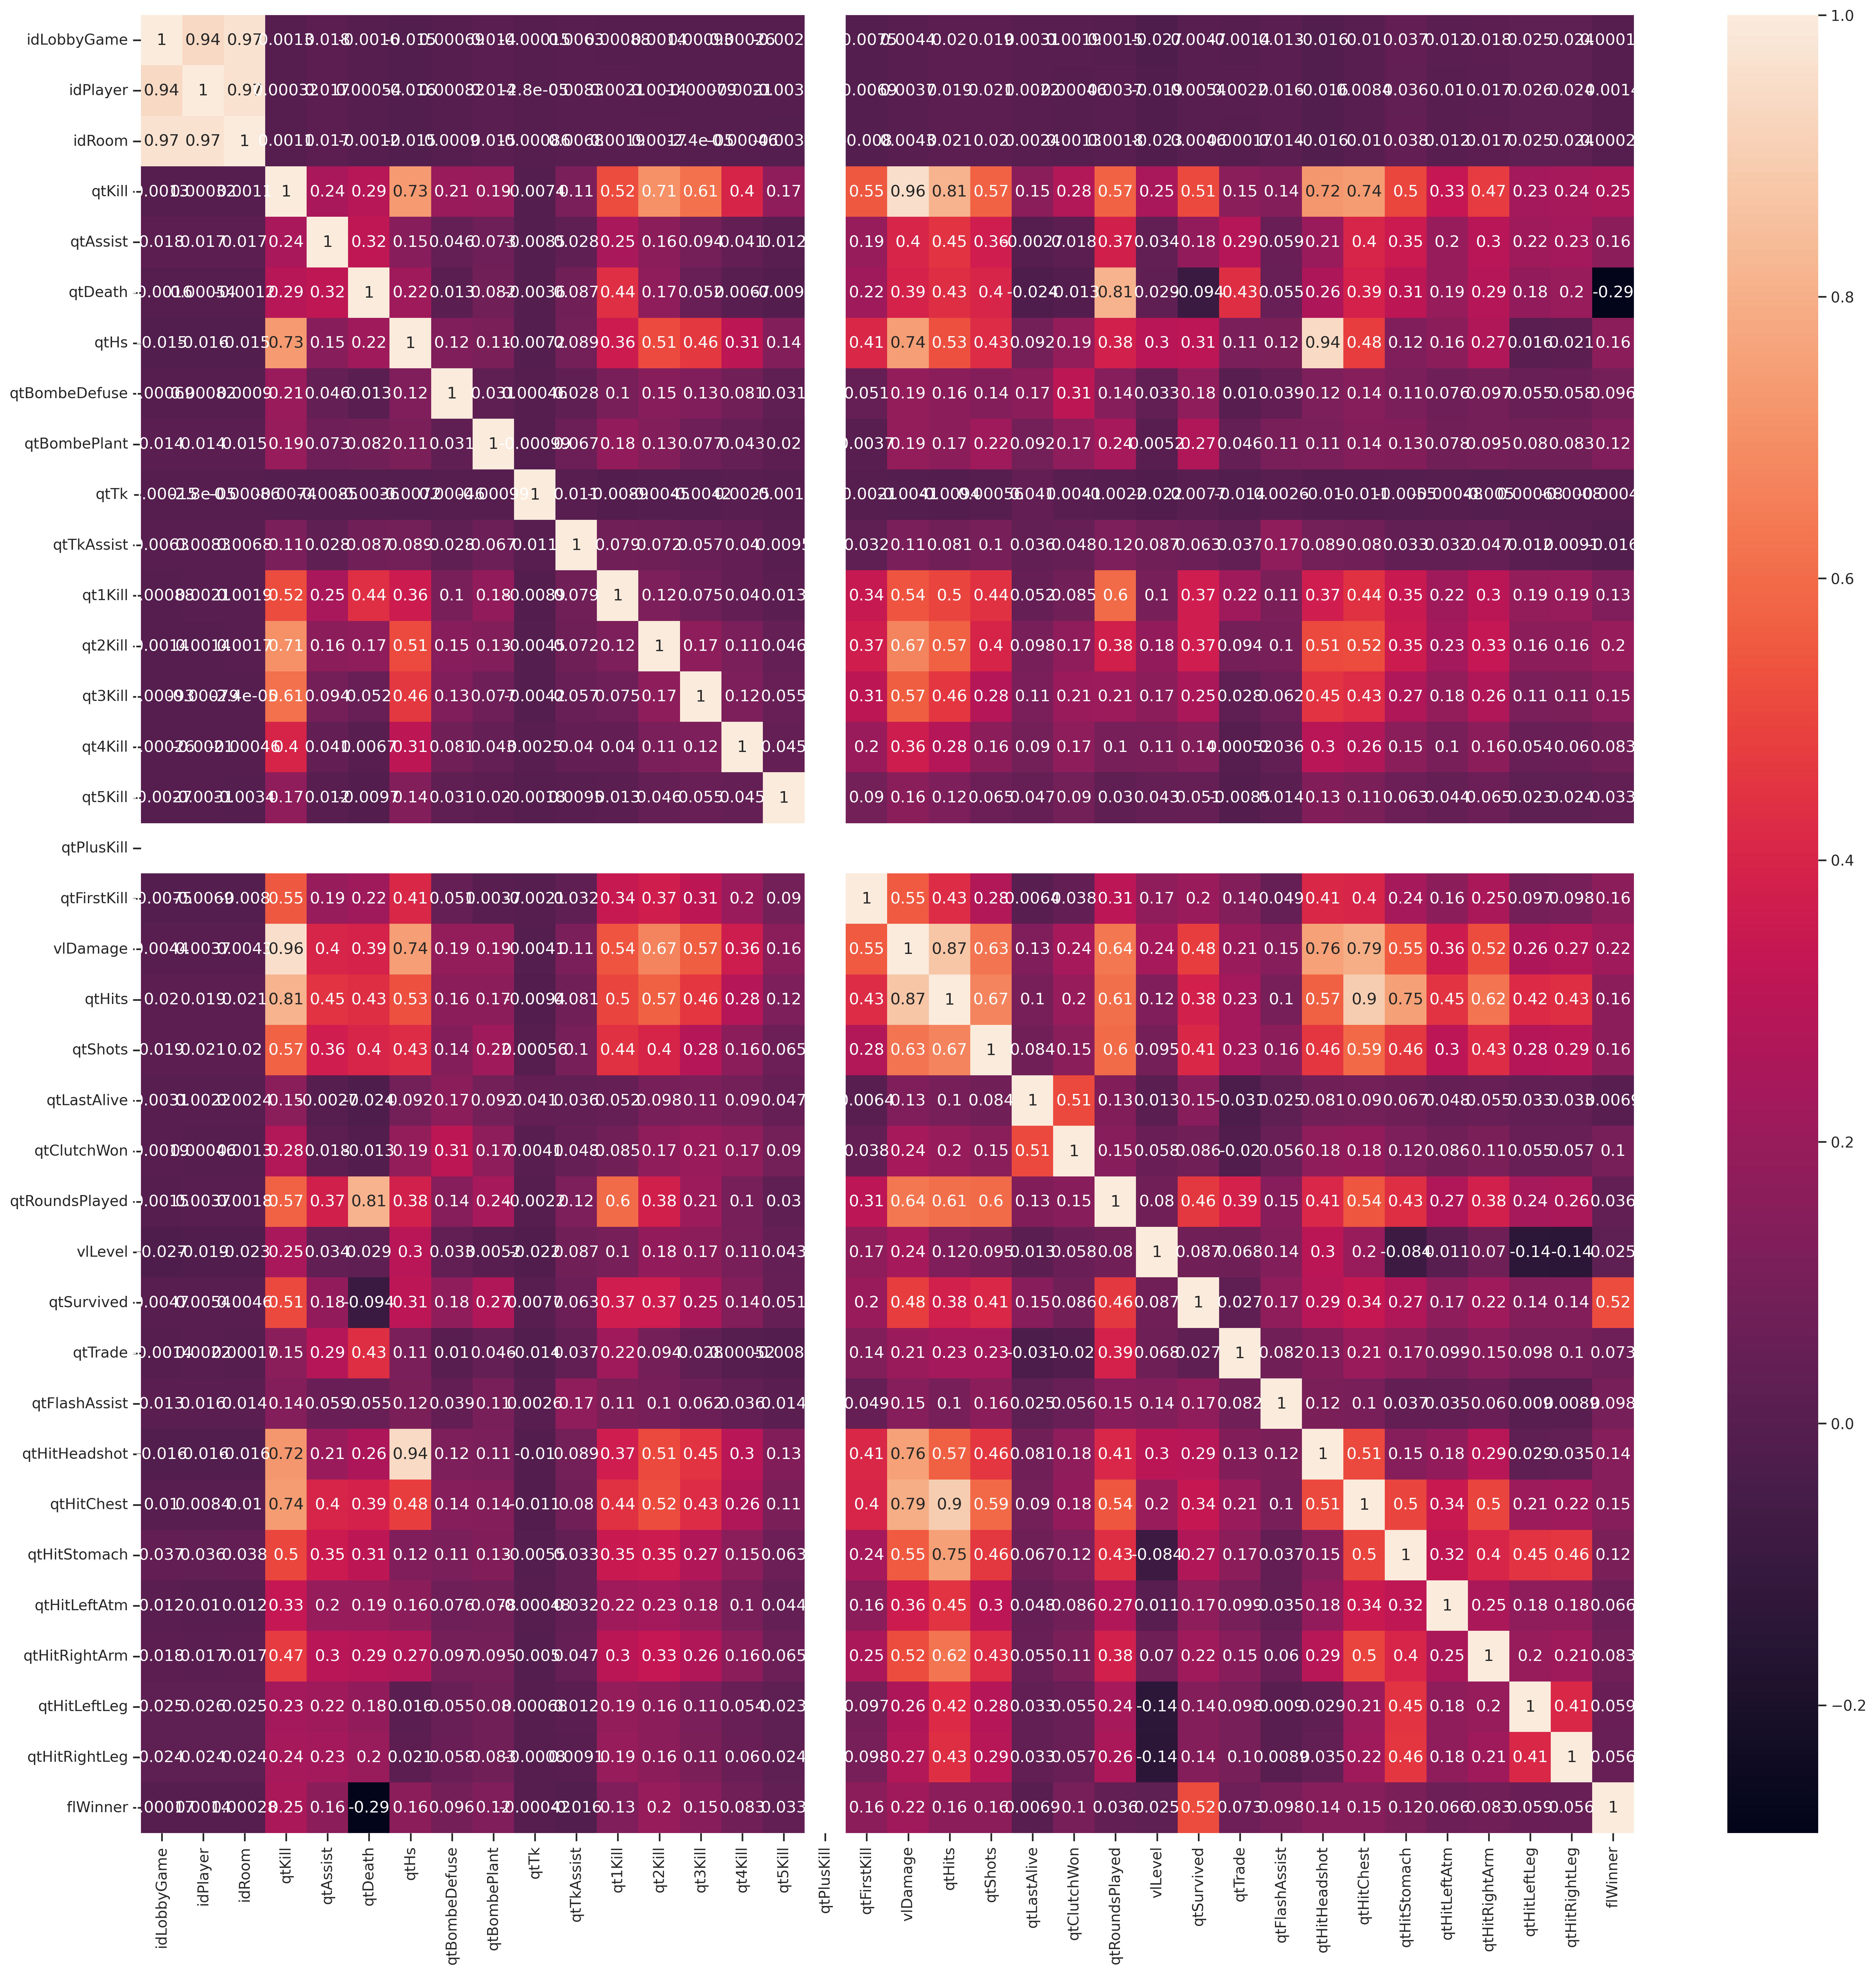

In [ ]:
fig = plt.figure(figsize=(25,25))
corrMatrix = tb_lobby_stats_player.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

###  Feature Engineering/Data Prep

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
fullcol = ['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
       'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive',
       'qtClutchWon', 'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived',
       'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest',
       'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg',
       'qtHitRightLeg']
fullnum_col = ['qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
        'vlDamage', 'qtHits', 'qtShots', 'qtRoundsPlayed','vlLevel', 'qtSurvived',
       'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest',
       'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg','qtHitRightLeg']
workcol = ['qtKill', 'qtAssist', 'qtHs', 'qtBombePlant','qt1Kill','qt2Kill','qt3Kill','qtFirstKill',
           'vlDamage','qtHits','qtShots','qtClutchWon','qtSurvived','qtHitHeadshot','qtHitChest','qtHitStomach']
num_col = ['qtKill', 'qtAssist', 'qtHs', 'qtBombePlant','qt1Kill','qt2Kill','qt3Kill','vlDamage','qtHits','qtShots','qtSurvived','qtHitHeadshot','qtHitChest','qtHitStomach']

* There are 184,152 rows in our data set, and 705 of them contain Nan values.
* Since we have a bulk dataset, we decided to eliminate the Nan values and save the data set named 'sample'. 
* Moreover, according to our heatmap, we can conclude that most of the variables have weak relations with our estimator 'flWinner'. 
* Therefore, we selected the variables which have index more than 0.1 from the heatmap matrix. 
* For next step, we excluded the outlier in the numerical columns (27,211 rows of dataset contain outliers)
* Dummy varibales: qtFirstKill; qtLastAlive; qtClutchWon;descMapName

In [ ]:
#data cleaning
#drop NaN value in the dataset, since we have a huge amount of dataset, since we already have 
sample = tb_lobby_stats_player.dropna(axis = 0)

# only qtFirstKill qtClutchWon are categorical column
print(sample.shape[0])
q75, q25 = np.percentile(sample['vlDamage'],[75,25])
iqr = q75-q25
highb = q75 + 1.5* iqr
lowb = q25 - 1.5 * iqr
sample = sample[(sample['vlDamage']>lowb) & (sample['vlDamage']<highb)]

print(sample.shape[0])


183447
179577


In [ ]:
# Adding some interesting features
sample['percSurvived'] = sample['qtSurvived']/sample['qtRoundsPlayed']
sample['percPlantedBomb'] = sample['qtBombePlant']/sample['qtRoundsPlayed']
sample['K/D'] = sample['qtKill']/sample['qtDeath']

[Text(0.5, 1.0, 'Logistic Regression of Percentage Survived vs Match Won')]

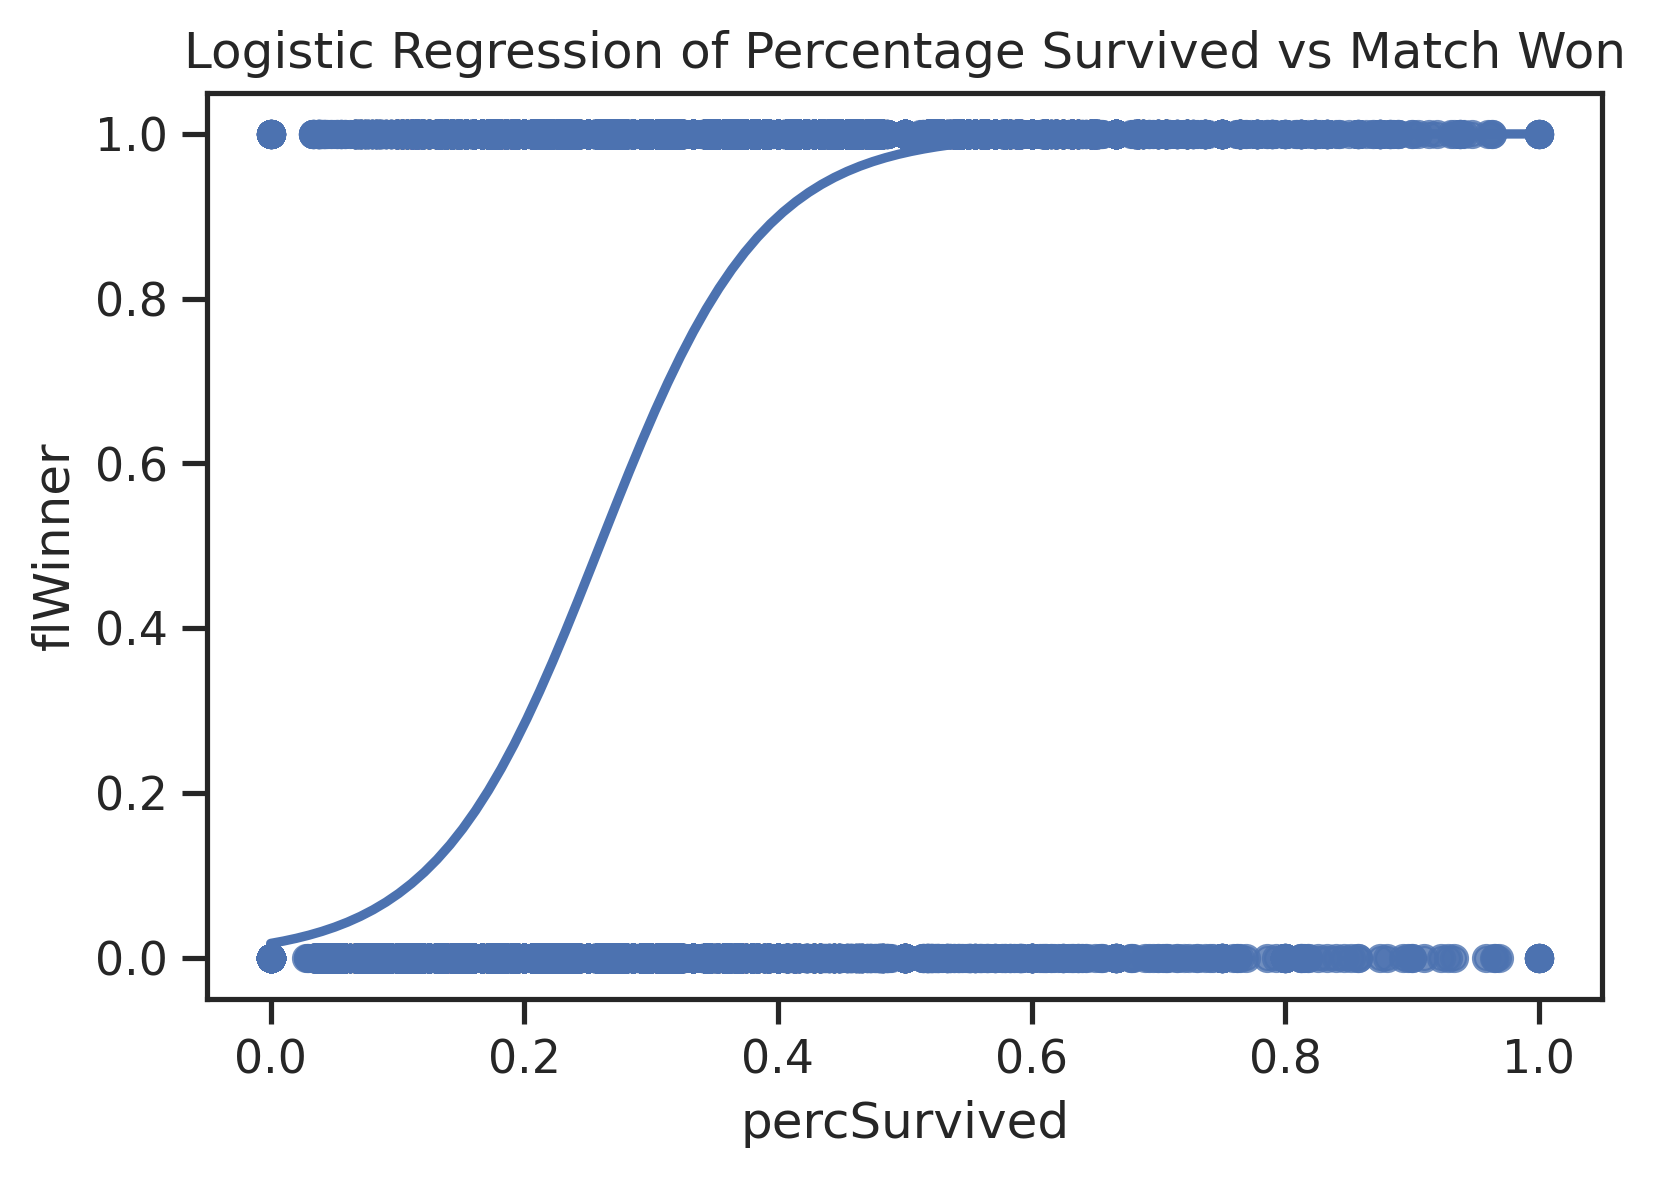

In [ ]:
# Using Seaborn's regplot function to explore some relationships
sns.regplot(x='percSurvived', y='flWinner', data=sample, logistic=True, ci=None).set(title='Logistic Regression of Percentage Survived vs Match Won')

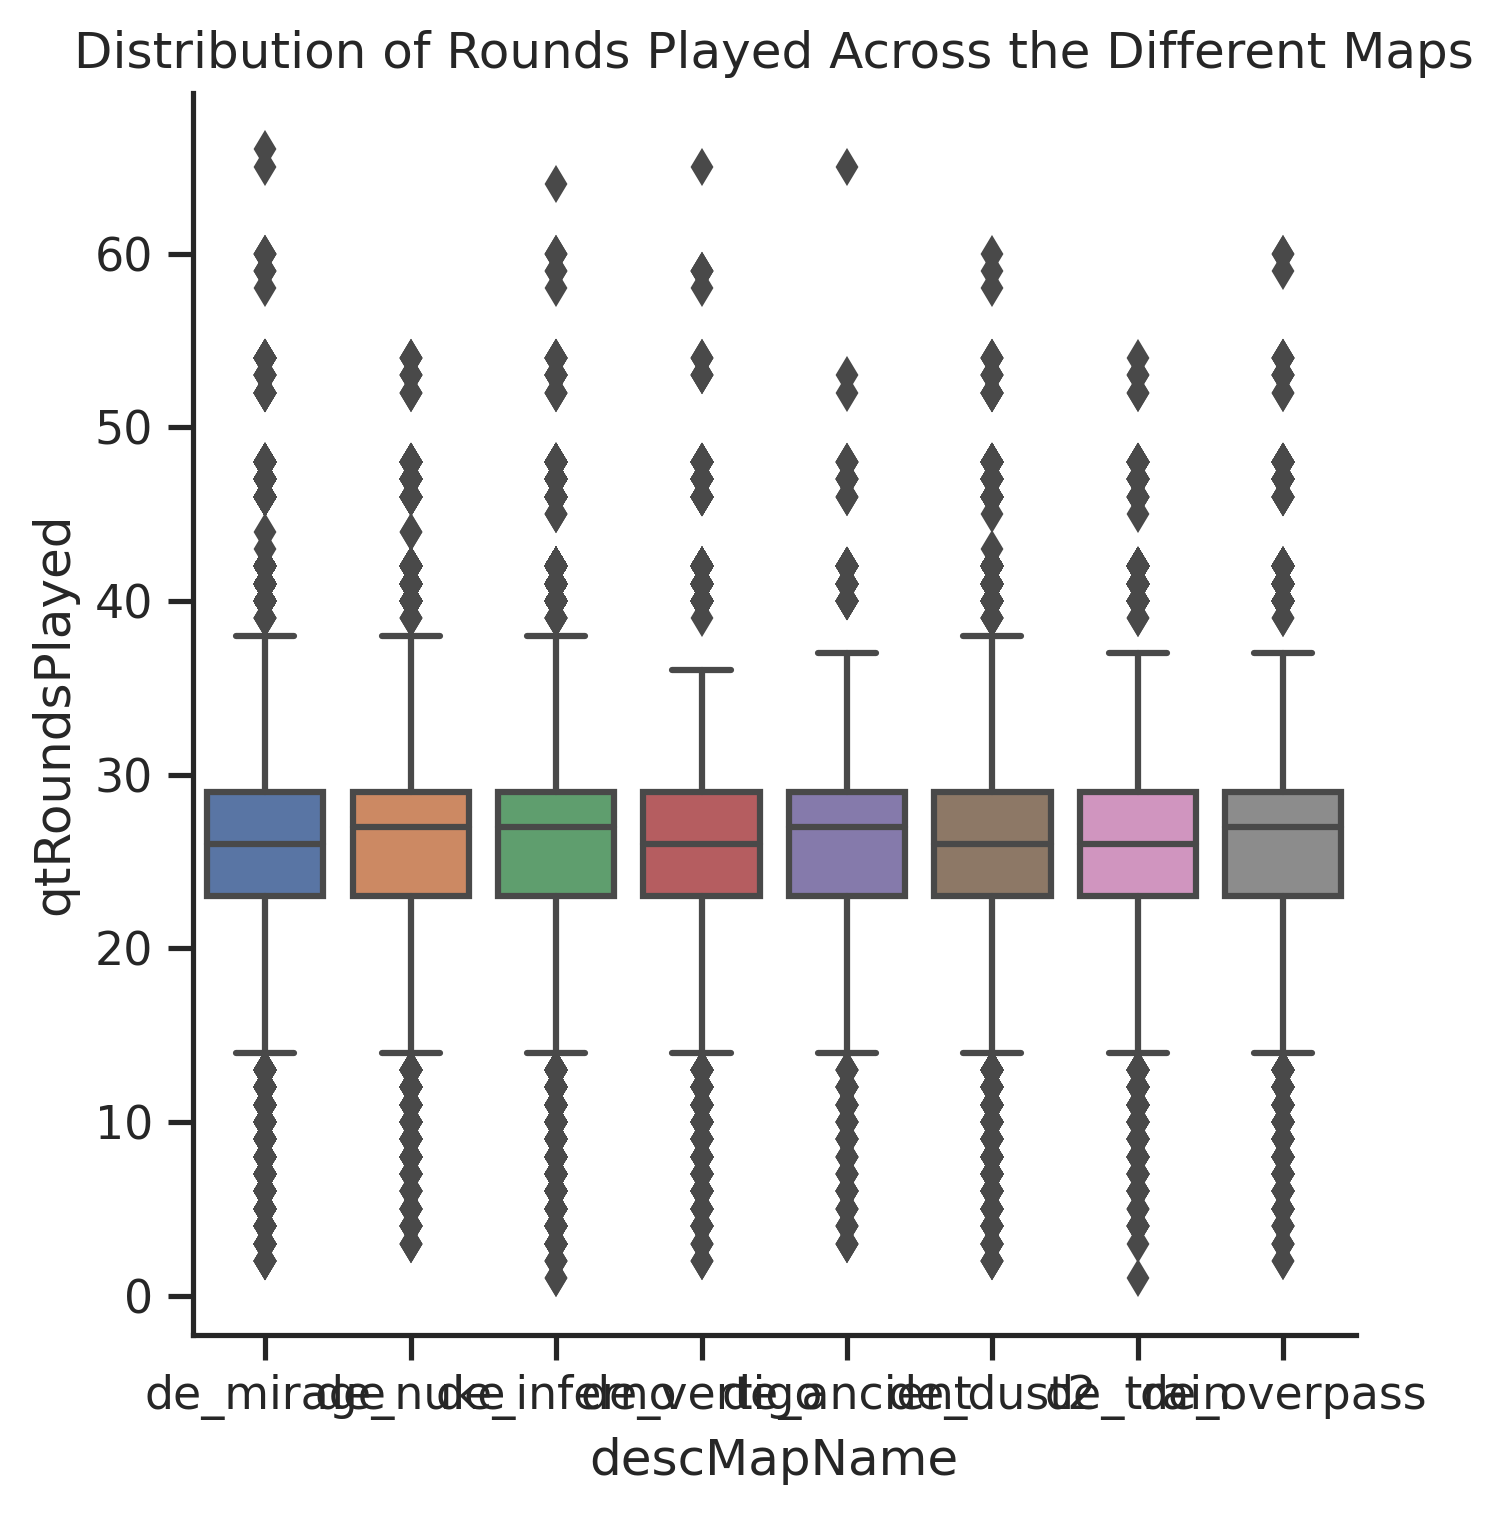

In [ ]:
# Exploring Map Popularity
sns.catplot(x="descMapName", y='qtRoundsPlayed', kind="box", data=sample).set(title = 'Distribution of Rounds Played Across the Different Maps')

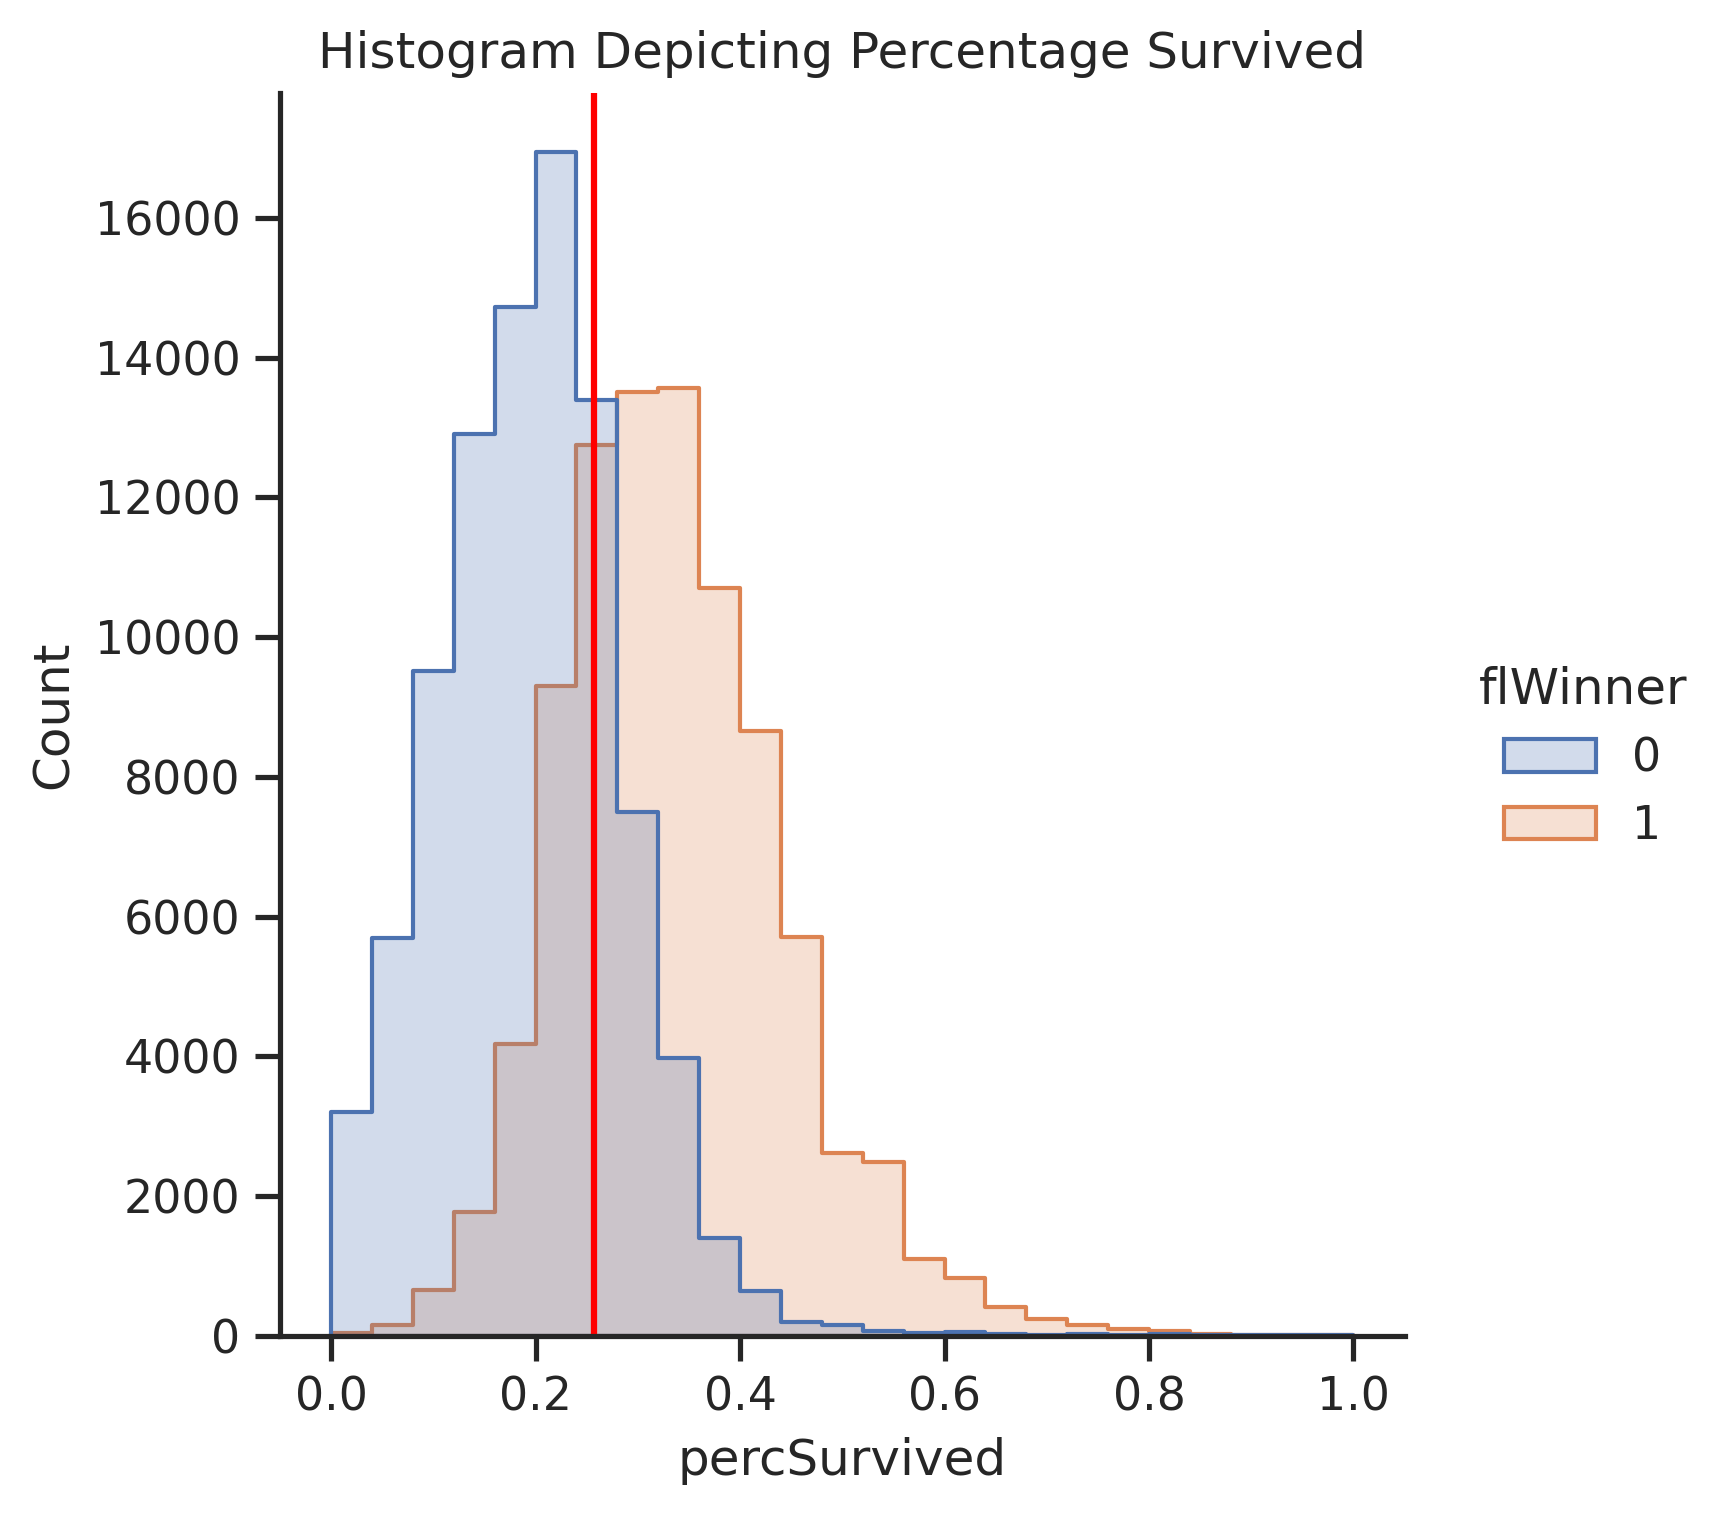

In [ ]:
# Historgram depicting the percent who survived in relation to winning the match
sns.displot(sample, x = 'percSurvived', hue = 'flWinner', element = 'step', bins = 25).set(title='Histogram Depicting Percentage Survived')
plt.axvline(x=sample.percSurvived.median(),
            color='red')

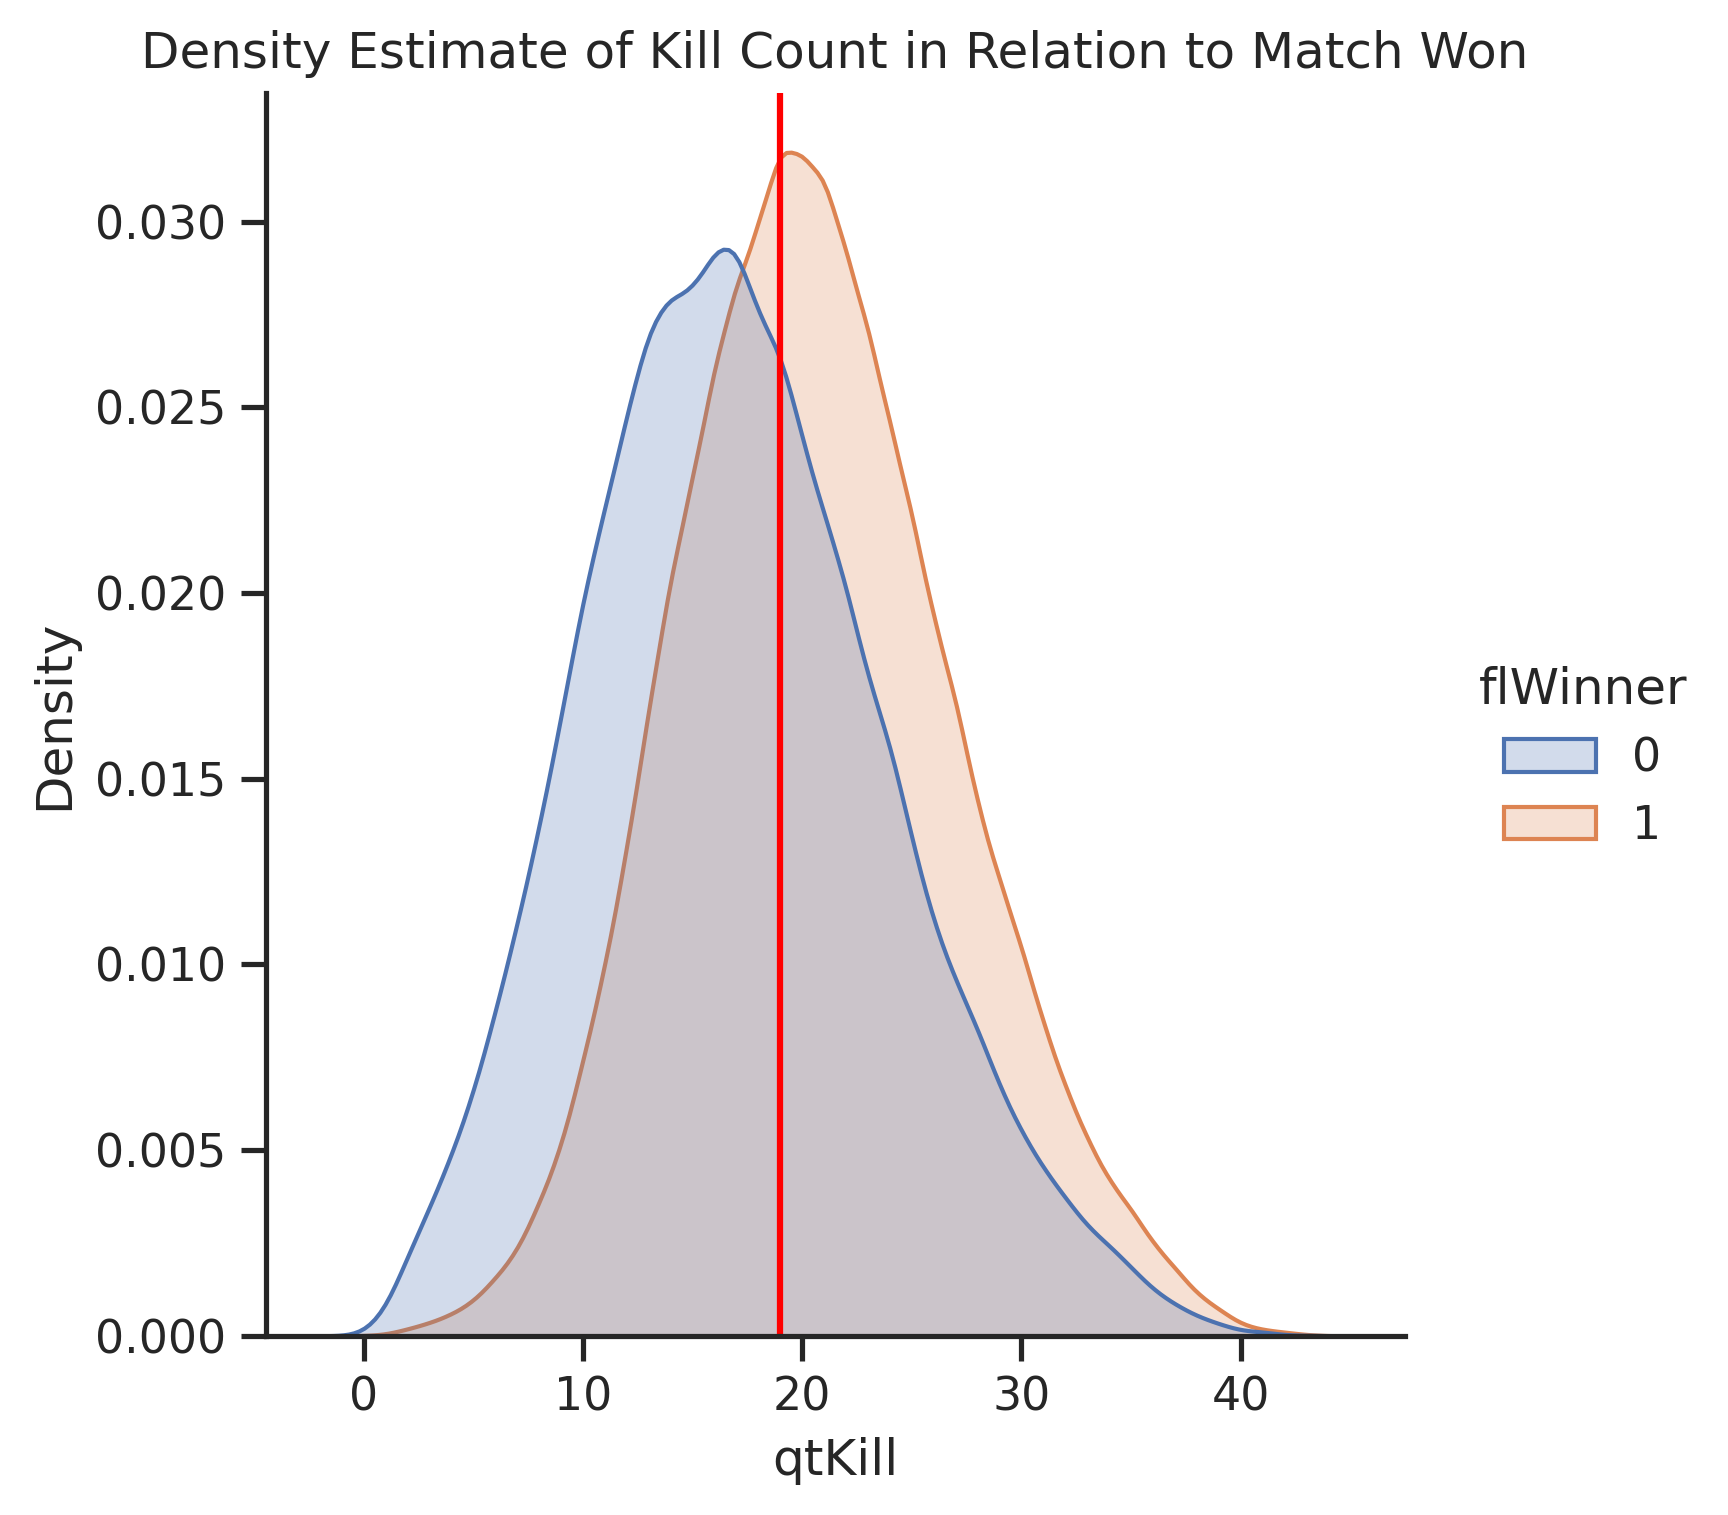

In [ ]:
# Density representation of kill count with winning the match
sns.displot(sample, x = 'qtKill', hue = 'flWinner', kind = 'kde', fill = True).set(title='Density Estimate of Kill Count in Relation to Match Won')
plt.axvline(x=sample.qtKill.median(),
            color='red')

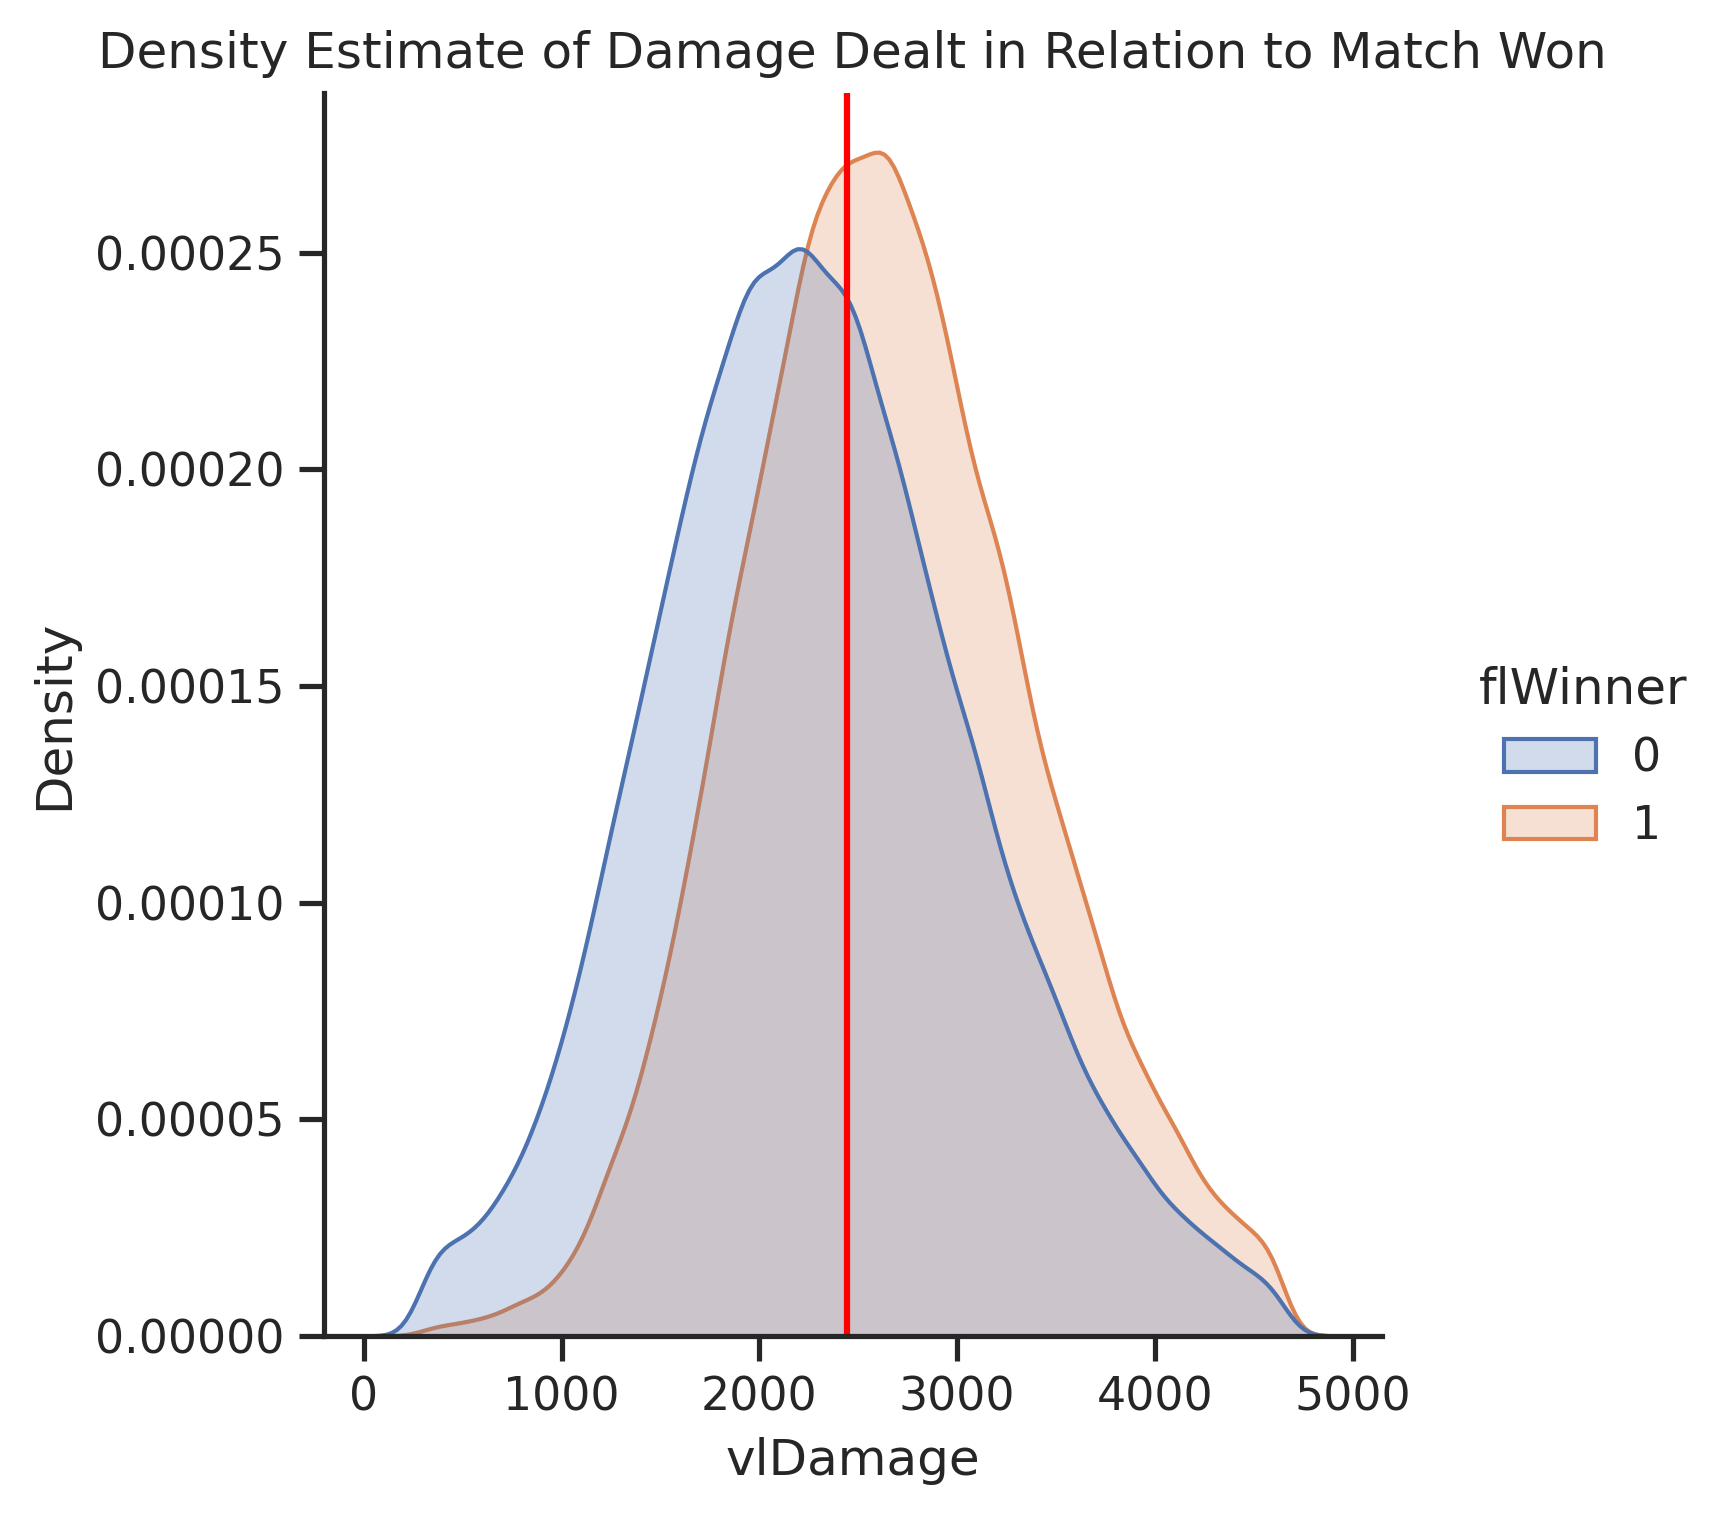

In [ ]:
# Similarly, below is a density representation of damage dealt in relation with winning the match
sns.displot(sample, x = 'vlDamage', hue = 'flWinner', kind = 'kde', fill = True).set(title='Density Estimate of Damage Dealt in Relation to Match Won')
plt.axvline(x=sample.vlDamage.median(),
            color='red')

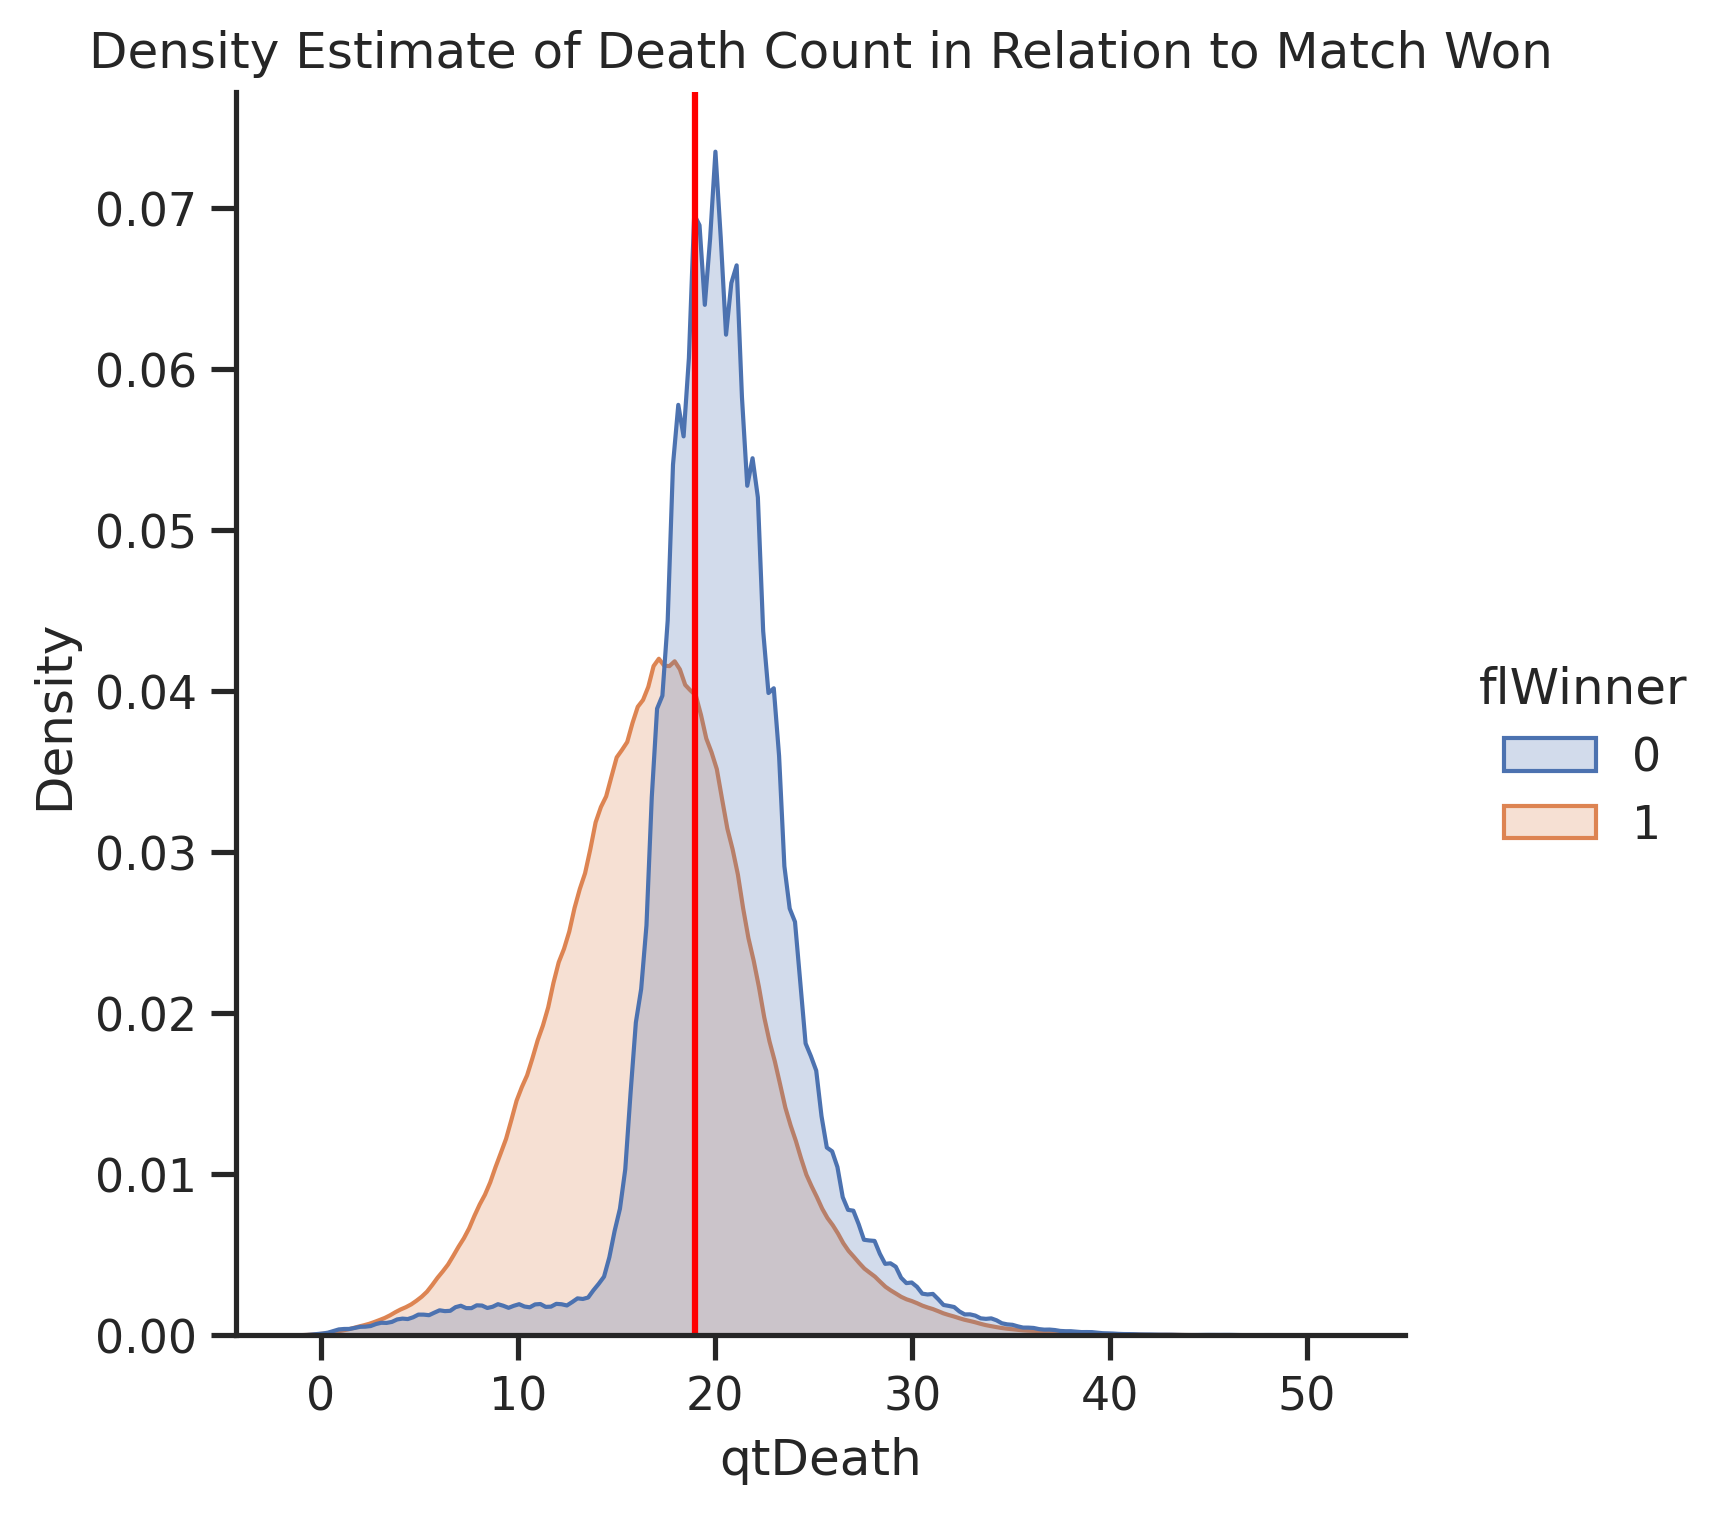

In [ ]:
# Death count shows that those that lost the match had more deaths
sns.displot(sample, x = 'qtDeath', hue = 'flWinner', kind = 'kde', fill = True).set(title='Density Estimate of Death Count in Relation to Match Won')
plt.axvline(x=sample.qtKill.median(),
            color='red')

prepare dataset

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler 

X = sample[fullcol]
X['descMapName'],_ = pd.factorize(X['descMapName'])
y = sample['flWinner']


#transfer string to numerical 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)  

sub_X_train = X_train[workcol]
sub_X_test = X_test[workcol]

num_X_train = X_train[fullnum_col]
num_X_test = X_test[fullnum_col]


scaler = StandardScaler() 
X1_std_train = scaler.fit_transform(X_train)
X1_std_test = scaler.fit_transform(X_test)

X1_std_train[:,:].std(axis=0), X1_std_train[:,:].mean(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([ 2.03153946e-17,  1.43743228e-16,  3.11817684e-17, -2.15496729e-16,
         1.71854064e-17, -2.60084295e-16, -8.03166761e-17, -8.82302310e-17,
         2.43312284e-17, -6.81510620e-17, -8.43620381e-17,  1.15337109e-16,
         6.07394863e-17,  7.11038809e-17, -1.18112759e-19, -3.66740117e-17,
         0.00000000e+00,  8.39781717e-17, -2.29611204e-16, -5.84658157e-18,
         6.00308098e-17,  3.73826882e-17,  8.26789313e-17, -1.59452225e-16,
         2.14374658e-17,  1.26380652e-16, -7.80134773e-17, -1.15986729e-16,
        -2.55123560e-17, -1.79531394e-17, -6.82101183e-17, -1.11262219e-16,
         6.08280709e-17,  1.34235151e-16, -8.60451450e-17, -2.85832877e-17]))

## modeling 

Model baseline - using the  [Zero Rule Algorithm](https:/machinelearningmasterycomimplement-baseline-machine-learning-algorithms-scratch-python/), there are 50.4% of the game end with defeat, which mean that 50.4% in column 'flWinner' have value 0. 

In [ ]:
# baseline percentage of defeat - 0
baseline = 1- sum(sample['flWinner'])/sample.shape[0]
baseline

# can also use mean 
# tb_lobby_stats_player['flWinner'].mean()

0.5040623242397412

### Logistic regression


In [ ]:
#model 1 -> logistic reg  - full set df
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=5).fit(X_train, y_train)
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

# calculate accuracy
accuracy_train = accuracy_score(ytrain_predict, y_train)
accuraccy_test = accuracy_score(ytest_predict, y_test)

print("accuracy for the training dataset is " + str(accuracy_train))
print("accuracy for the testing dataset is " + str(accuraccy_test))

accuracy for the training dataset is 0.6988762924299345
accuracy for the testing dataset is 0.7012537756703396


In [ ]:
#model 1 -> logistic reg - selected feature 

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=5).fit(sub_X_train, y_train)
ytrain_predict = LR.predict(sub_X_train)
ytest_predict = LR.predict(sub_X_test)

# calculate accuracy
accuracy_train = accuracy_score(ytrain_predict, y_train)
accuraccy_test = accuracy_score(ytest_predict, y_test)

print("accuracy for the training dataset is " + str(accuracy_train))
print("accuracy for the testing dataset is " + str(accuraccy_test))

accuracy for the training dataset is 0.7301855114864191
accuracy for the testing dataset is 0.7294679468790605


In [ ]:
#model 1 -> logistic reg - stdandardized 

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=5).fit(X1_std_train, y_train)
ytrain_predict = LR.predict(X1_std_train)
ytest_predict = LR.predict(X1_std_test)

# calculate accuracy
accuracy_train = accuracy_score(ytrain_predict, y_train)
accuraccy_test = accuracy_score(ytest_predict, y_test)

print("accuracy for the training dataset is " + str(accuracy_train))
print("accuracy for the testing dataset is " + str(accuraccy_test))

accuracy for the training dataset is 0.8037002559925529
accuracy for the testing dataset is 0.8001721199439766


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=5).fit(X1_std_train, y_train)
prediction = clf.predict(X)
clf.score(X, y)

0.5040623242397412

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'C': [100, 10, 1.0, 0.1],
          'penalty': ['None','l1', 'l2']}

lg = GridSearchCV(LogisticRegression(), params)
lg.fit(X_train, y_train)
lg.best_params_

In [ ]:
lg.best_score_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'C': [100, 10, 1.0, 0.1],
          'penalty': ['None','l1', 'l2']}
lg = RandomizedSearchCV(LogisticRegression(), params)
lg.fit(X_train, y_train)
lg.best_params_

In [ ]:
lg.best_score_

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator = model_to_tune, param_grid = param_grid, cv = inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, data, target, cv=outer_cv, n_jobs=2)
print(f"The mean score using nested cross-validation is: "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

NameError: ignored

In [ ]:
# Confustion matrix to measure classification success/show types of errors

cm = confusion_matrix(y_test,ytest_predict)
print(cm[0])
fpr = cm[1][0]/sum(cm[1])
tpr = cm[0][0]/sum(cm[0])
print('False positive rate', fpr)
print('True positive rate', tpr)
sns.heatmap(cm, annot = True, fmt='d', cbar=False, cmap='Blues').set(title = "Confusion Matrix of Logistic Regression")

Best Threshold = 0.510000


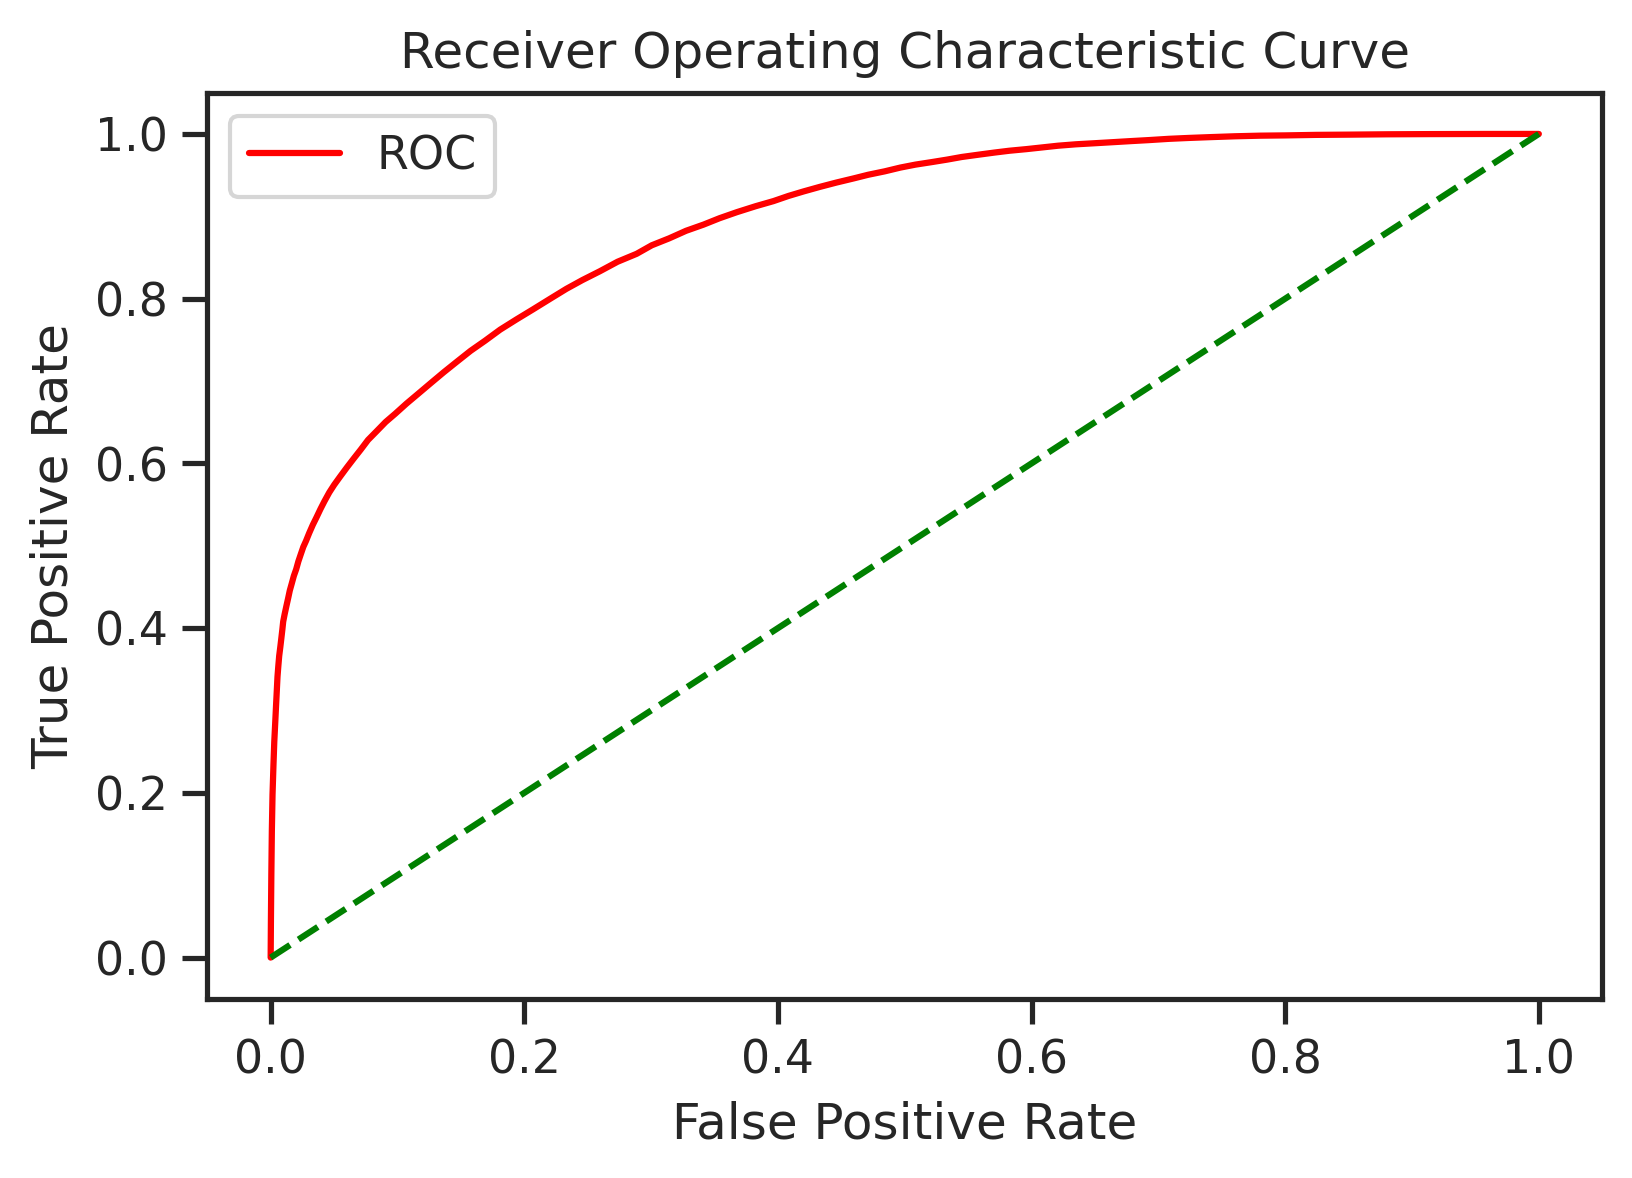

In [ ]:
# ROC Curve to interpret the Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
model =RandomForestClassifier()
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
J = tper - fper
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold = %f' % (best_thresh))
plot_roc_curve(fper, tper)

# Top left of the curve is the ideal. 

**important**<br />
* standardized df > selected features > full df
* has high accuracy and quit similar w linear regression's best accuracy 
* prob need tunning on it 

### random forest 

In [ ]:
#model 2 ->  randon forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=5)
clf.fit(X, y)

ytrain_predict = clf.predict(X_train)
ytest_predict = clf.predict(X_test)

print("accuracy for the training dataset is " + str(accuracy_score(ytrain_predict, y_train)))
print("accuracy for the testing dataset is " + str(accuracy_score(ytest_predict , y_test)))

accuracy for the training dataset is 0.7529256291765019
accuracy for the testing dataset is 0.7515397985184186


In [ ]:
importances = list(clf.feature_importances_)
predictor_importances = [(fullcol, round(importance, 2)) for fullcol, importance in zip(fullcol, importances)]
predictor_importances = sorted(predictor_importances, key = lambda x: x[1], reverse = True)
var_names = []
var_val = []
for tup in predictor_importances : 
  var,val = tup
  var_names.append(var)
  var_val.append(val)

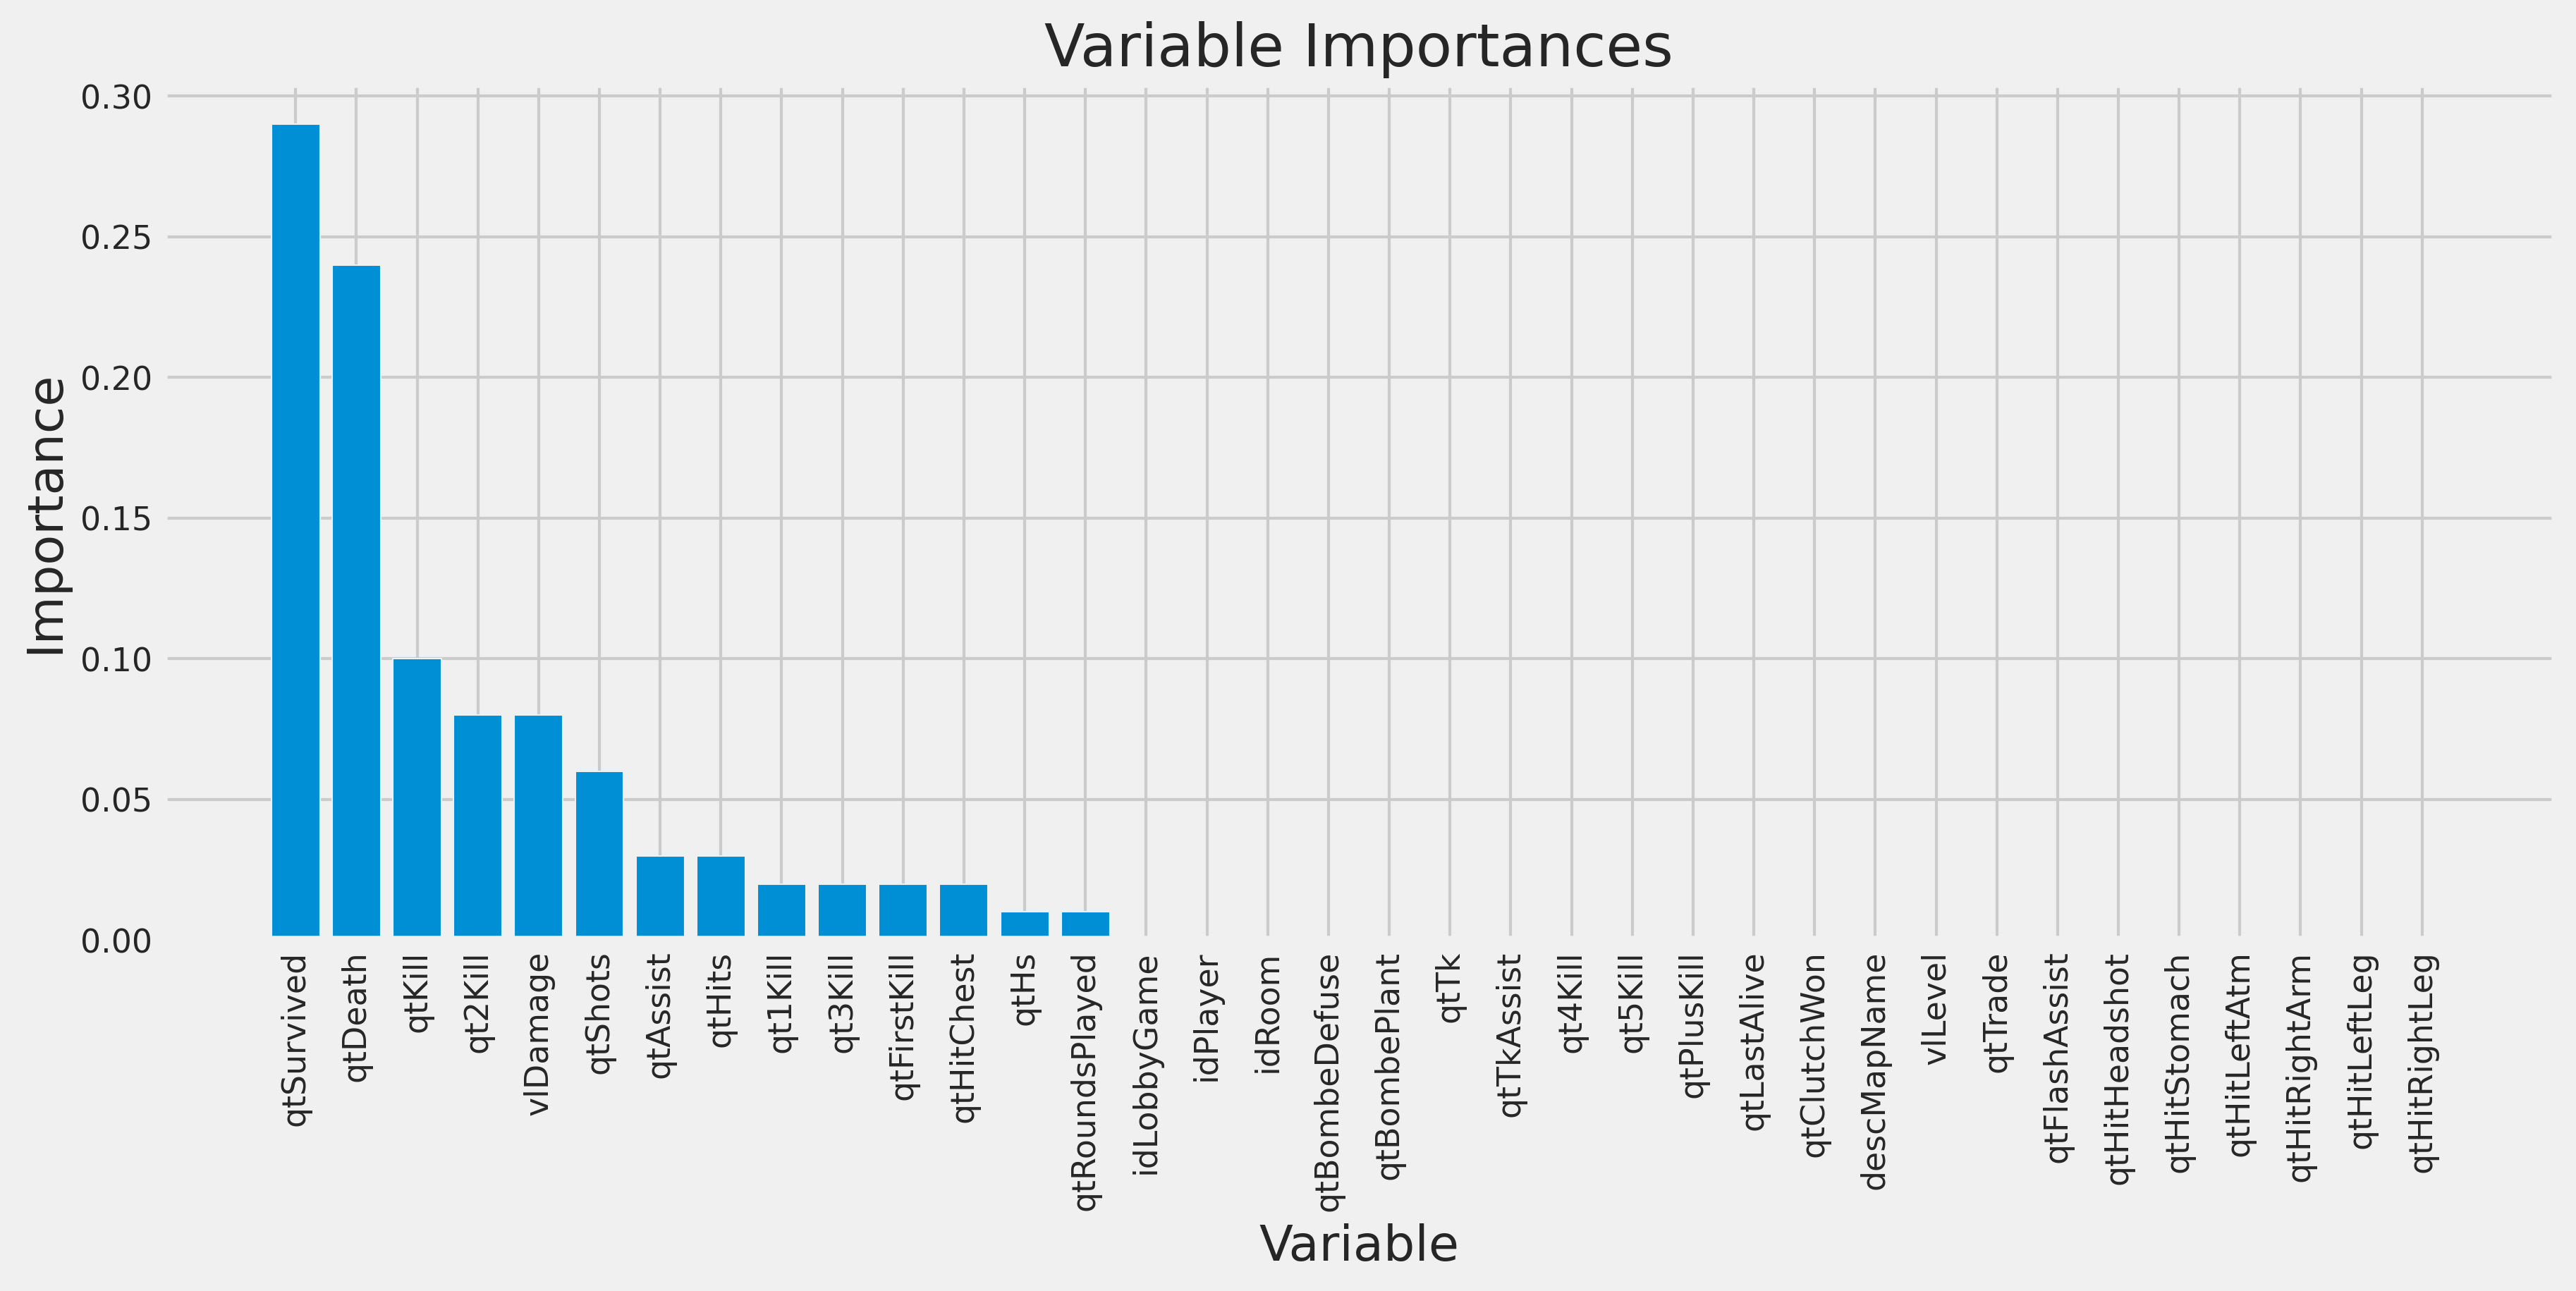

In [ ]:
plt.style.use('fivethirtyeight')

importances = sorted(importances)
x_values = list(range(len(importances)))
plt.figure(figsize=(13,5))
plt.bar(var_names, var_val, orientation = 'vertical')
plt.xticks(x_values, var_names, rotation='vertical') 
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

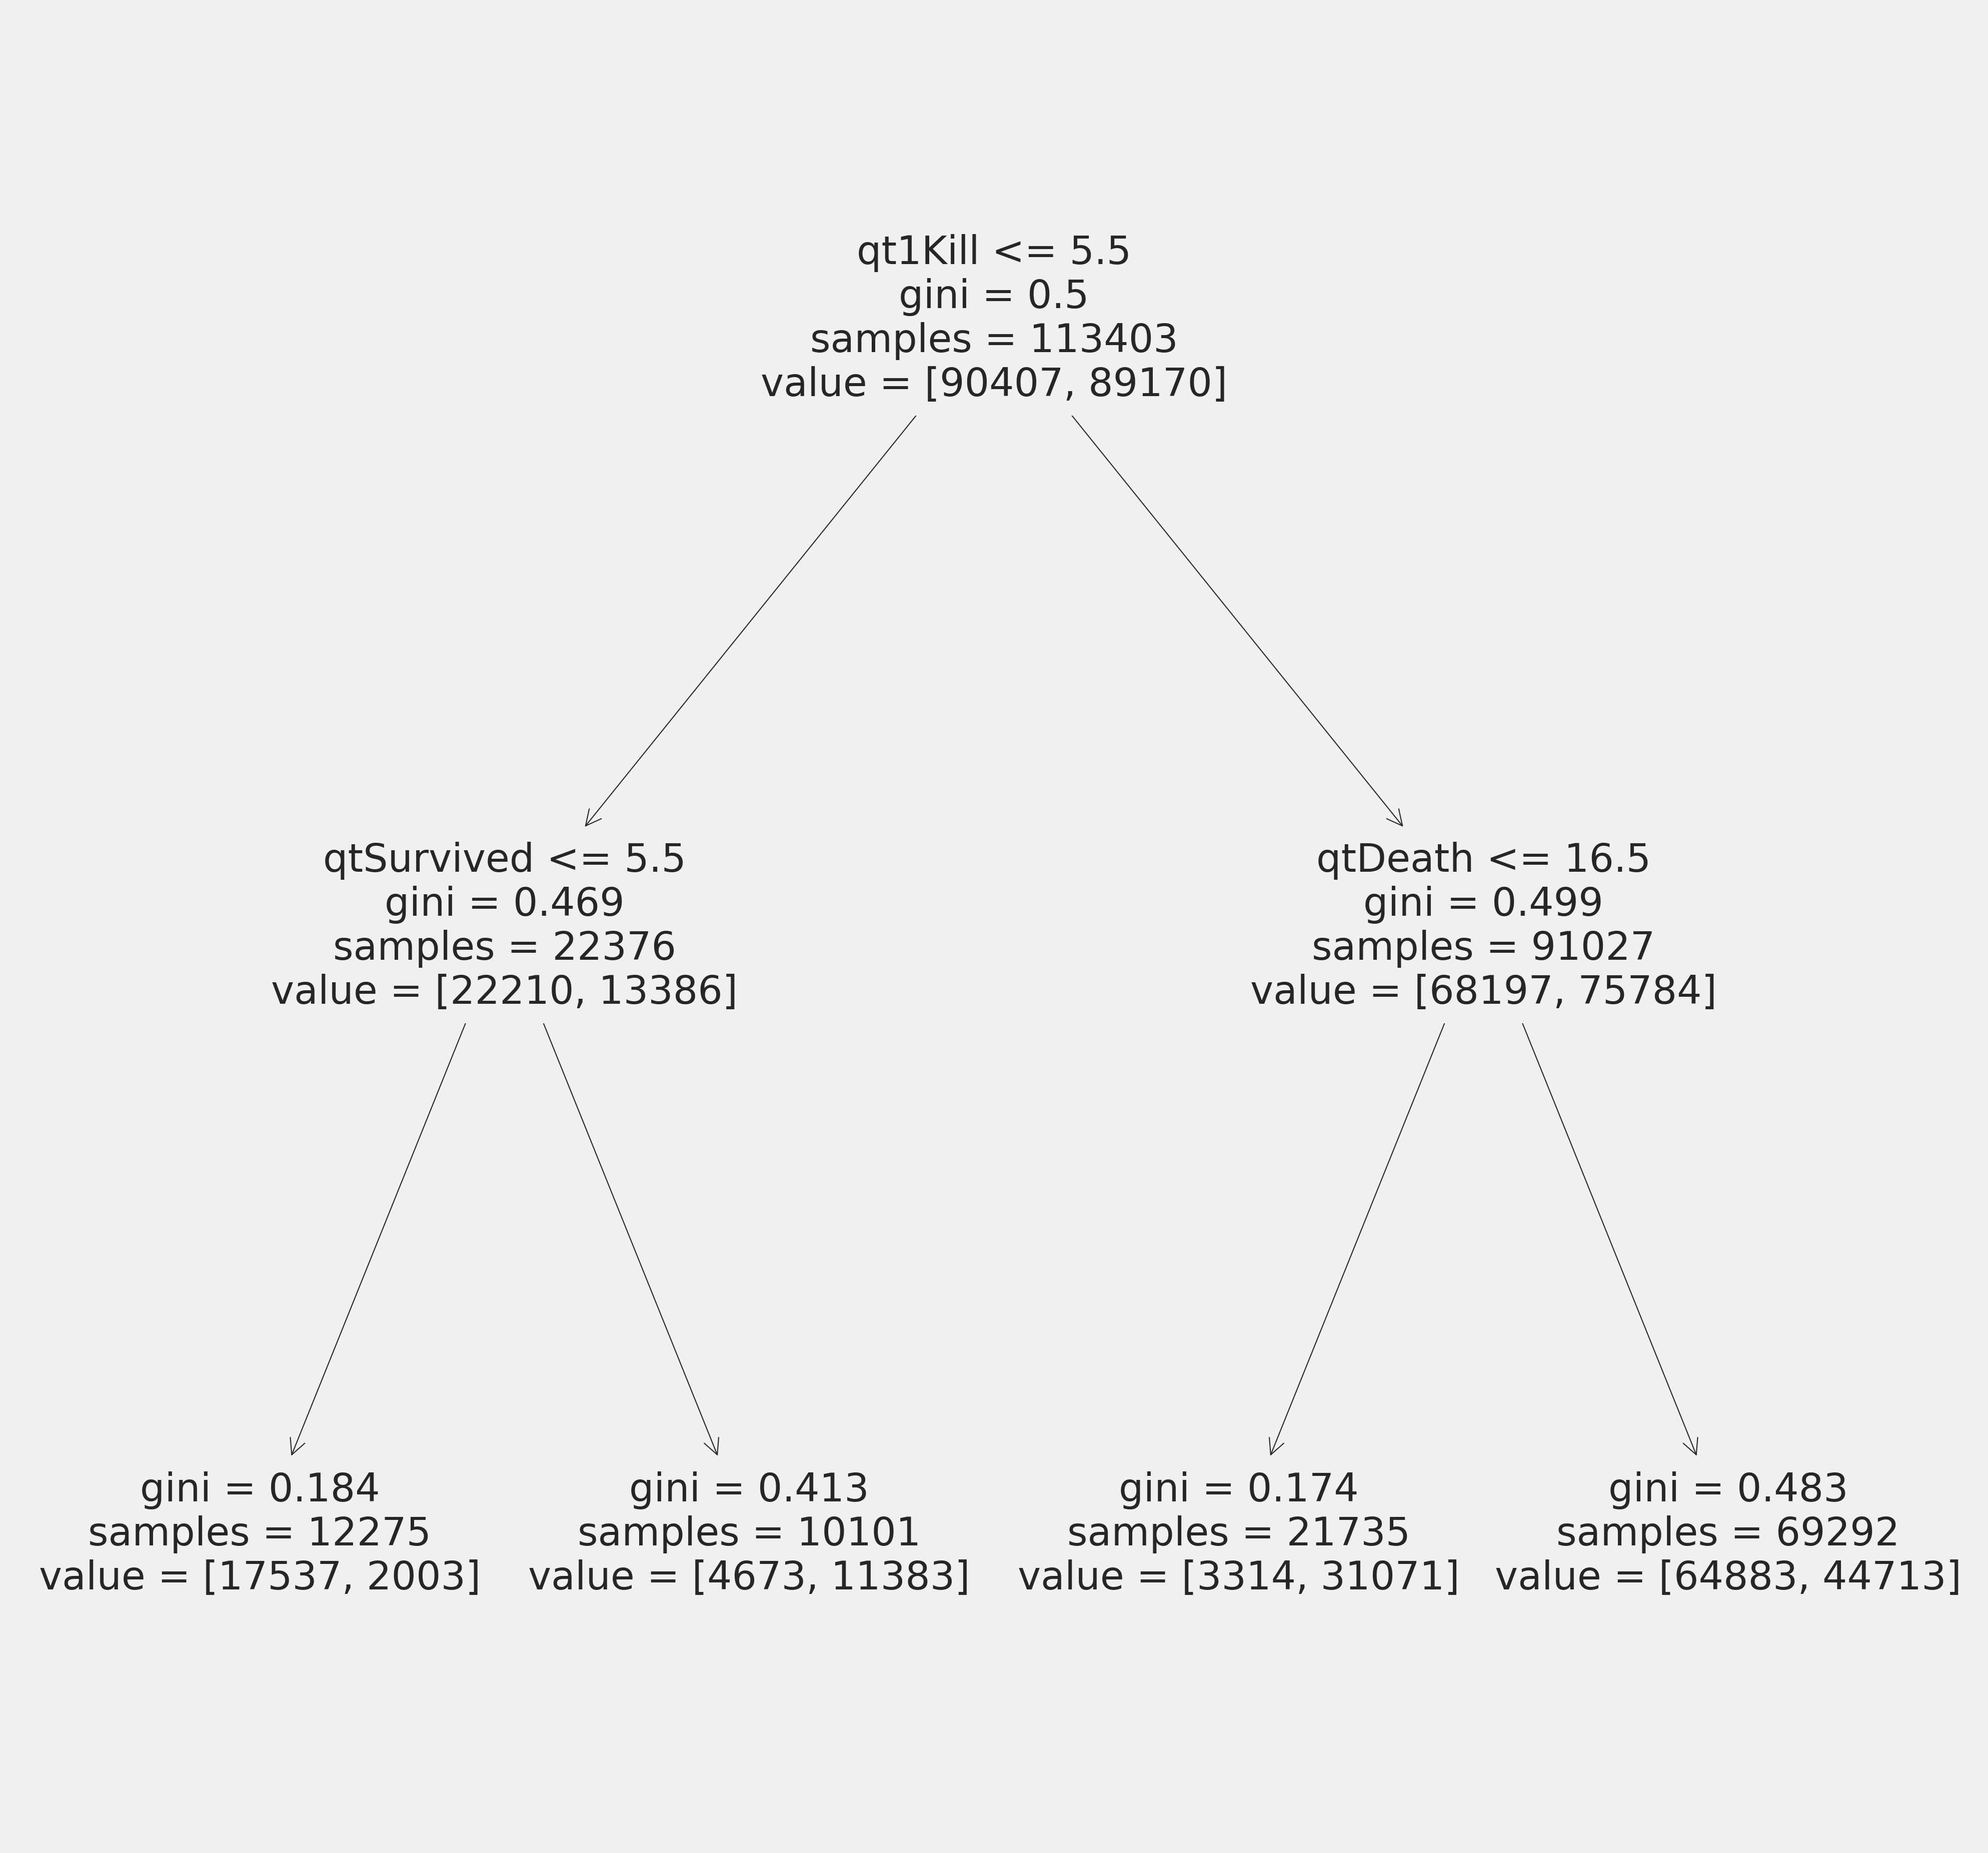

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15)) 
tree.plot_tree(clf.estimators_[22], feature_names=fullcol); 

In [ ]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), params)
gs_NB.fit(X_train, y_train)
gs_NB.best_params_from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
parameters = {'max_depth':[5,10]}
clf = GridSearchCV(rfc, parameters)
clf.fit(X, y)
GridSearchCV(estimator=rfc, param_grid= parameters )
# sorted(clf.cv_results_.keys())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10]})

Text(364.75, 0.5, 'predicted label')

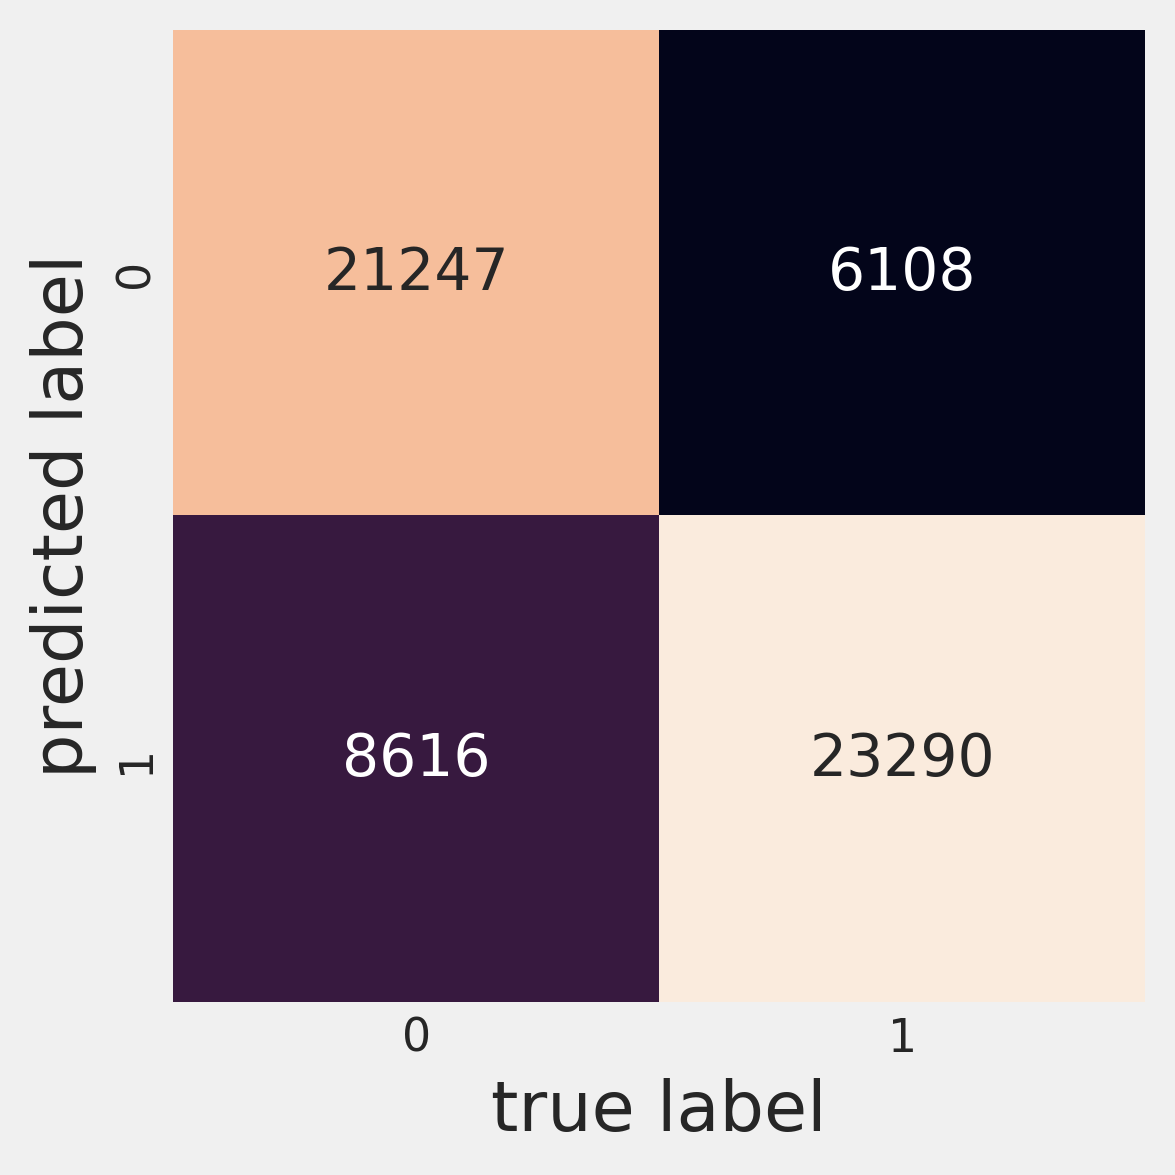

In [ ]:
# Confusion matrix for our random forest
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ytest_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_train,y_train)

ytrain_predict = decision_tree.predict(X_train)
ytest_predict = decision_tree.predict(X_test)

print("accuracy for the training dataset is " + str(accuracy_score(ytrain_predict, y_train)))
print("accuracy for the testing dataset is " + str(accuracy_score(ytest_predict , y_test)))


accuracy for the training dataset is 0.7443980850427209
accuracy for the testing dataset is 0.7434737854575522


In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,max_features = 'auto',splitter = 'random')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.6354321613301704

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'random')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7405179637292187

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7749656150830816

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', criterion='entropy')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7717190830455216

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', min_weight_fraction_leaf=0.5)
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.5040623242094874

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', max_features='auto')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7336573909357111

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', max_leaf_nodes=4)
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7440930496060408

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', min_impurity_decrease=0.5)
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.5040623242094874

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', class_weight='balanced')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7750324407700756

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', class_weight='balanced', ccp_alpha=0.5)
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.5040623242094874

we can tell changing splitter to best helped 

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=5, max_depth=5,splitter = 'best', class_weight='balanced')
decision_tree = decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
mean(scores)

0.7750324407700756

In [ ]:
params = {'criterion':['gini','entropy'],
          'max_depth':[5,10,50,100]}
dt = GridSearchCV(DecisionTreeClassifier(), params)
dt.fit(X_train, y_train)
dt.best_params_

In [ ]:
dt.best_score_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'criterion':['gini','entropy'],
          'max_depth':[5,10,50,100]}
dt = RandomizedSearchCV(DecisionTreeClassifier(), params)
dt.fit(X_train, y_train)
dt.best_params_

In [ ]:
dt.best_score_

### navie bayes

In [ ]:
# explain why try NB 

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB().fit(X_train,y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

print("accuracy for the training dataset is " + str(accuracy_score(ytrain_predict,y_train)))
print("accuracy for the testing dataset is " + str(accuracy_score(ytest_predict,y_test)))

accuracy for the training dataset is 1.0
accuracy for the testing dataset is 0.7909248915813099


In [ ]:
scores = cross_val_score(GNB, X, y, cv=5)
mean(scores)

0.6926777903992016

In [ ]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), params)
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gs = RandomizedSearchCV(GaussianNB(), params)
gs.fit(X_train, y_train)
gs.best_params_

In [ ]:
gs.best_score_

### permutation_importance

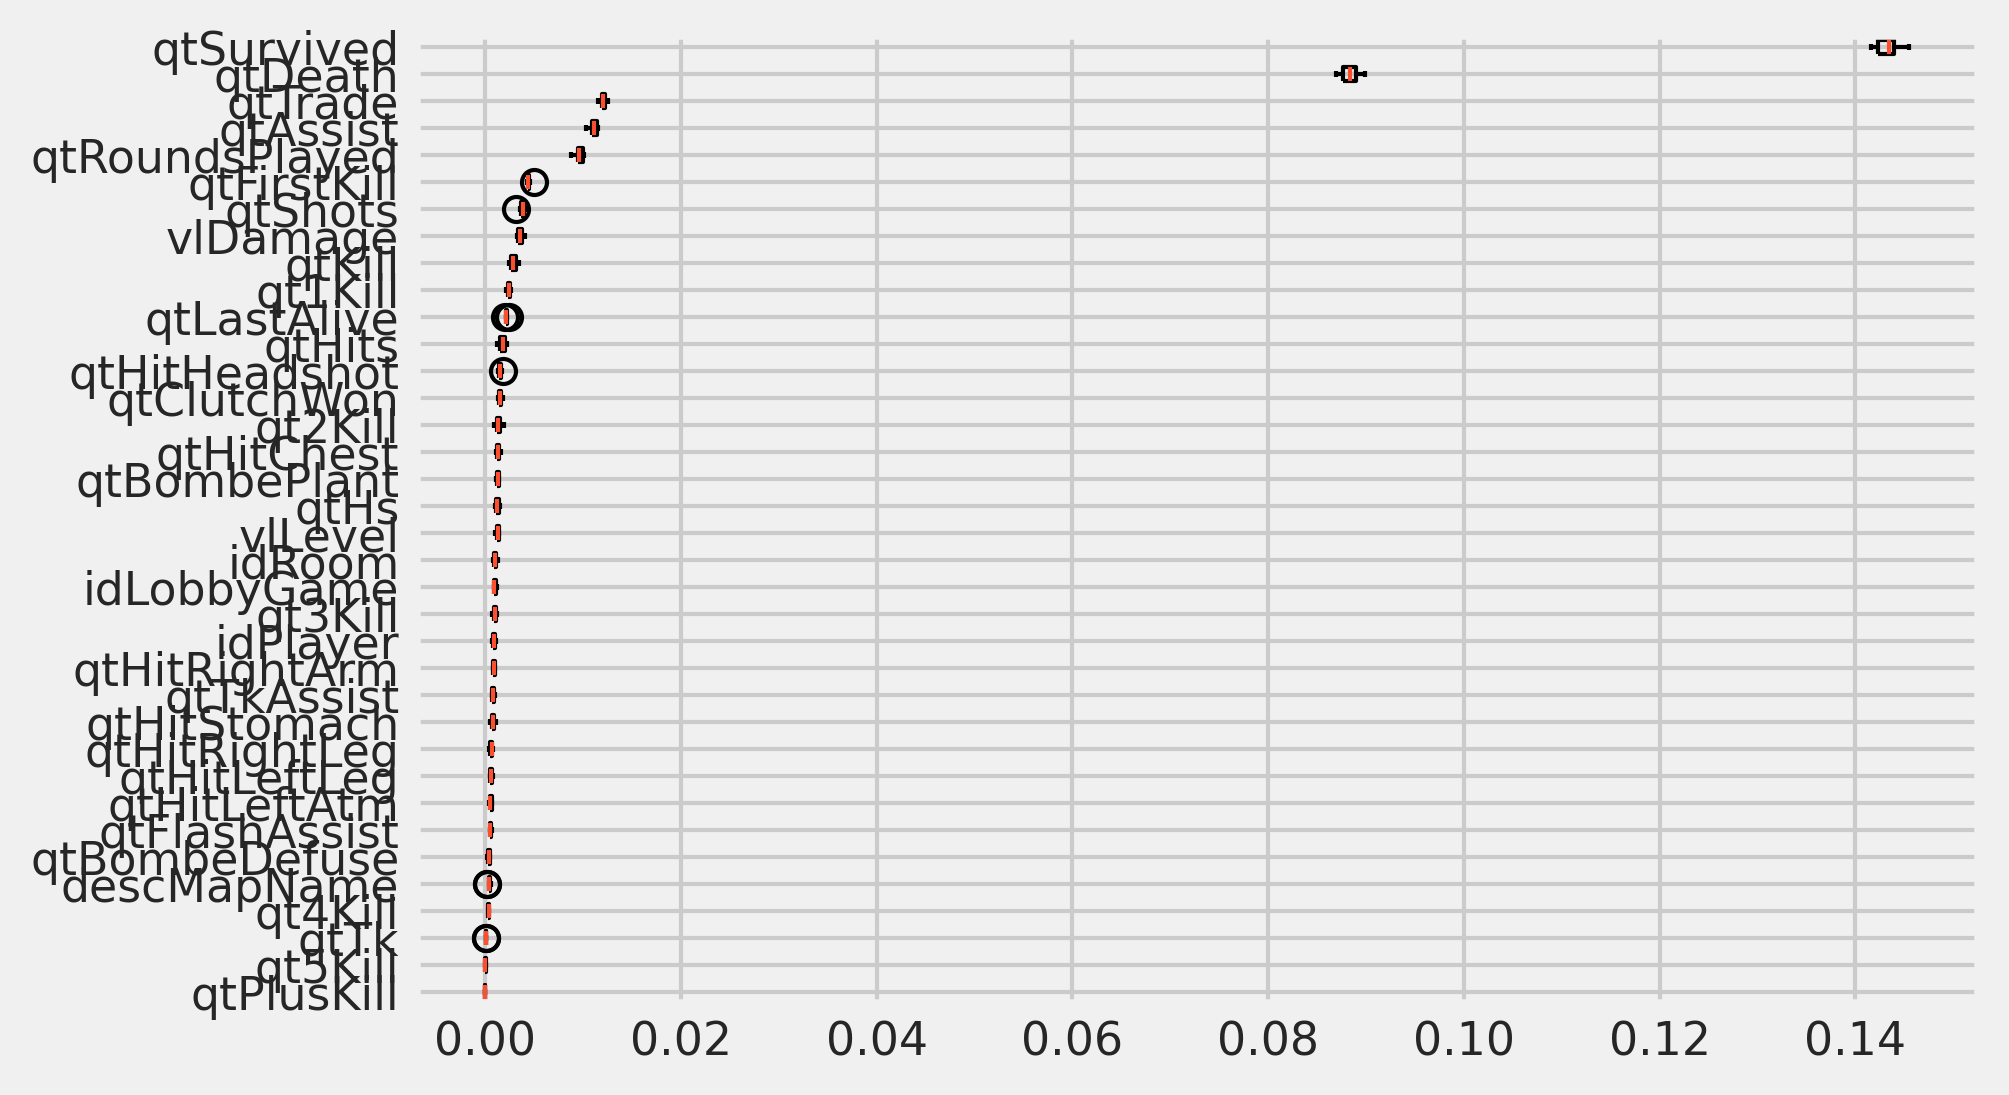

In [ ]:
from sklearn.inspection import permutation_importance
result_2 = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result_2.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result_2.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])

plt.figure(figsize=(100, 40))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance', fontsize=50)
# plt.legend()
plt.show()

### fun finding - linear regression

In [ ]:
# model fun ->  LinearRegression better result w full feature
# normal df w/o outlier 
from sklearn.linear_model import LinearRegression
model = LinearRegression()    

# original dataset w/o outlier 
model.fit(X_train, y_train)            
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# fit in treshold
# find the best treshold for the testing and use that reshold to calculate training's accuracy 
tre_list = list(range(0,1000))
accuraccy_test = []
# collect accuracy from 100 treshold
for i in tre_list:
  test_pre = np.where(ytest_predict > (i/1000),1,0)
  accuraccy_test.append(accuracy_score(test_pre, y_test))
# find the best treshold  
tre = accuraccy_test.index(max(accuraccy_test))/1000

train_pre= np.where((ytrain_predict > tre),1,0)
accuraccy_train = accuracy_score(train_pre, y_train)

print("The treshold is " + str(tre))
print("accuracy for the training dataset is " + str(accuraccy_train))
print("accuracy for the testing dataset is " + str(max(accuraccy_test)))

The treshold is 0.486
accuracy for the training dataset is 0.8033179294524418
accuracy for the testing dataset is 0.8005602335431397


In [ ]:
# model fun ->  LinearRegression better result w full feature # with standardized df 
from sklearn.linear_model import LinearRegression
model = LinearRegression()    
model.fit(X1_std_train, y_train)            
ytrain_predict = model.predict(X1_std_train)
ytest_predict = model.predict(X1_std_test)


# fit in treshold
# find the best treshold for the testing and use that reshold to calculate training's accuracy 
tre_list = list(range(0,1000))
accuraccy_test = []
# collect accuracy from 100 treshold
for i in tre_list:
  test_pre = np.where(ytest_predict > (i/1000),1,0)
  accuraccy_test.append(accuracy_score(test_pre, y_test))
# find the best treshold  
tre = accuraccy_test.index(max(accuraccy_test))/1000

train_pre= np.where((ytrain_predict > tre),1,0)
accuraccy_train = accuracy_score(train_pre, y_train)

print("The treshold is " + str(tre))
print("accuracy for the training dataset is " + str(accuraccy_train))
print("accuracy for the testing dataset is " + str(max(accuraccy_test)))

The treshold is 0.0
accuracy for the training dataset is 0.5518301805246185
accuracy for the testing dataset is 0.4505830141239601


In [ ]:
# model fun ->  LinearRegression better result w numerical feature 
# normal df w/o outlier 
from sklearn.linear_model import LinearRegression
model = LinearRegression()    

# original dataset w/o outlier 
model.fit(X_train[fullnum_col], y_train)            
ytrain_predict = model.predict(X_train[fullnum_col])
ytest_predict = model.predict(X_test[fullnum_col])

# fit in treshold
# find the best treshold for the testing and use that reshold to calculate training's accuracy 
tre_list = list(range(0,1000))
accuraccy_test = []
# collect accuracy from 100 treshold
for i in tre_list:
  test_pre = np.where(ytest_predict > (i/1000),1,0)
  accuraccy_test.append(accuracy_score(test_pre, y_test))
# find the best treshold  
tre = accuraccy_test.index(max(accuraccy_test))/1000

train_pre= np.where((ytrain_predict > tre),1,0)
accuraccy_train = accuracy_score(train_pre, y_train)

print("The treshold is " + str(tre))
print("accuracy for the training dataset is " + str(accuraccy_train))
print("accuracy for the testing dataset is " + str(max(accuraccy_test)))

The treshold is 0.488
accuracy for the training dataset is 0.7961368396555737
accuracy for the testing dataset is 0.7935066907409595


**important**<br />
* use the testing's best treshold to calculate training's accuracy 
* we shouldnt use linear reg on our model bc its doesnt make sense but it work, so we will talk about it at last as a surprise
* full set of df > full set numerical columns > selected feature >full set standardized df 
* we dont need to tune linear